# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
validation_file="./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("X_train.shape:", X_train.shape, ", y_train.shape:",y_train.shape)
print("X_valid.shape:", X_valid.shape, ", y_valid.shape:",y_valid.shape)
print("X_test.shape:", X_test.shape, ", y_test.shape:",y_test.shape)

X_train.shape: (34799, 32, 32, 3) , y_train.shape: (34799,)
X_valid.shape: (4410, 32, 32, 3) , y_valid.shape: (4410,)
X_test.shape: (12630, 32, 32, 3) , y_test.shape: (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = [X_train.shape[1],X_train.shape[2]]

# TODO: How many unique classes/labels there are in the dataset.
classes,n_indicies,classCounts=np.unique(np.concatenate((y_train, y_valid, y_test)), return_index=True, return_counts=True)
print("classes.shape:", classes.shape, ", classes:", classes)
n_classes = classes.shape[0]
_,training_indicies,training_classCounts=np.unique(y_train, return_index=True, return_counts=True)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("training indicies =", training_indicies, "len:", len(training_indicies), ", shape:", training_indicies.shape, ", type of training_indicies[0]", type(training_indicies[0]))
print("training class counts =", training_classCounts, ", len:", len(training_classCounts))



classes.shape: (43,) , classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Number of training examples = 34799
Number of testing examples = 12630
Image data shape = [32, 32]
Number of classes = 43
training indicies = [ 9960  2220 31439  5370  6810 12360 21450 23730 15870 11040 17130  8580
 27329 21810 29219 29909  5010 30449 20370  6630 25950 25680  4500  1770
 10800 33449  1230 10350 26849 10560 25020   210 10140 26250 20010 18930
   900  4830 14010 25410  4200     0  9750] len: 43 , shape: (43,) , type of training_indicies[0] <class 'numpy.int64'>
training class counts = [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210] , len: 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
import csv
import random

SIGNNAMES="./signnames.csv"
signNameDictionary={}
#with open(SIGNNAMES) as csvfile:
#    signNameReader=csv.reader(csvfile)
#    for row in signNameReader:
#        print(', '.join(row))
with open(SIGNNAMES) as csvfile:
    signNameReader = csv.DictReader(csvfile)
    for row in signNameReader:
        #print(row['ClassId'], row['SignName'], ", type:", type(row))
        signNameDictionary[row['ClassId']]=row['SignName']

import collections
signNameDictionary={int(k) : v for k, v in signNameDictionary.items()}
#signNameDictionary=collections.OrderedDict(sorted(signNameDictionary.items()))
#print ("signNameDictionary:", signNameDictionary)
#print ("number of sign names:", len(signNameDictionary), ", same as number of classes?", (len(signNameDictionary)==n_classes))
assert len(signNameDictionary)==n_classes



class 0   : Speed limit (20km/h)                  180 samples


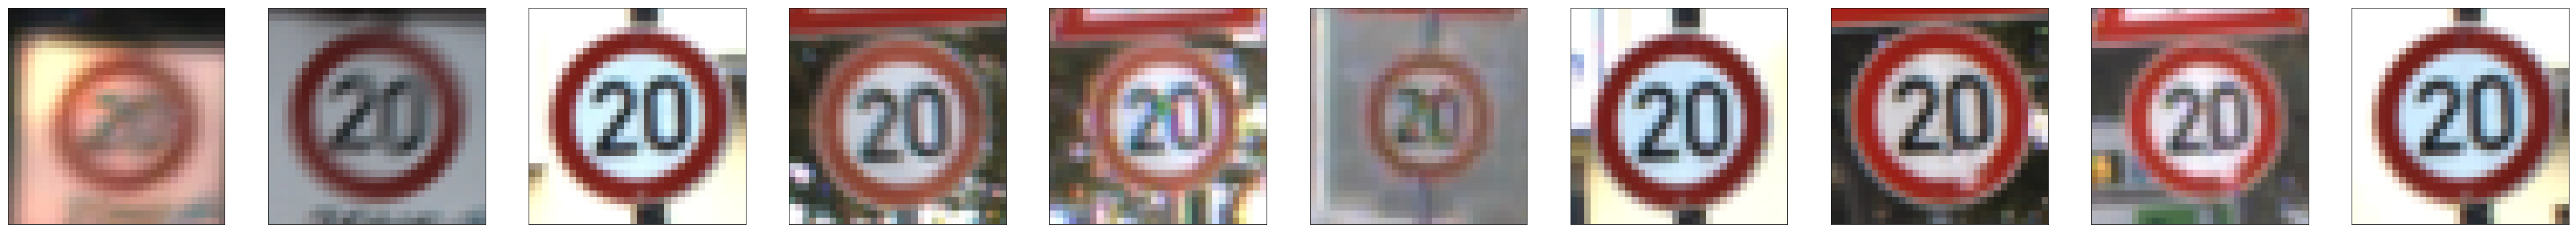

class 1   : Speed limit (30km/h)                 1980 samples


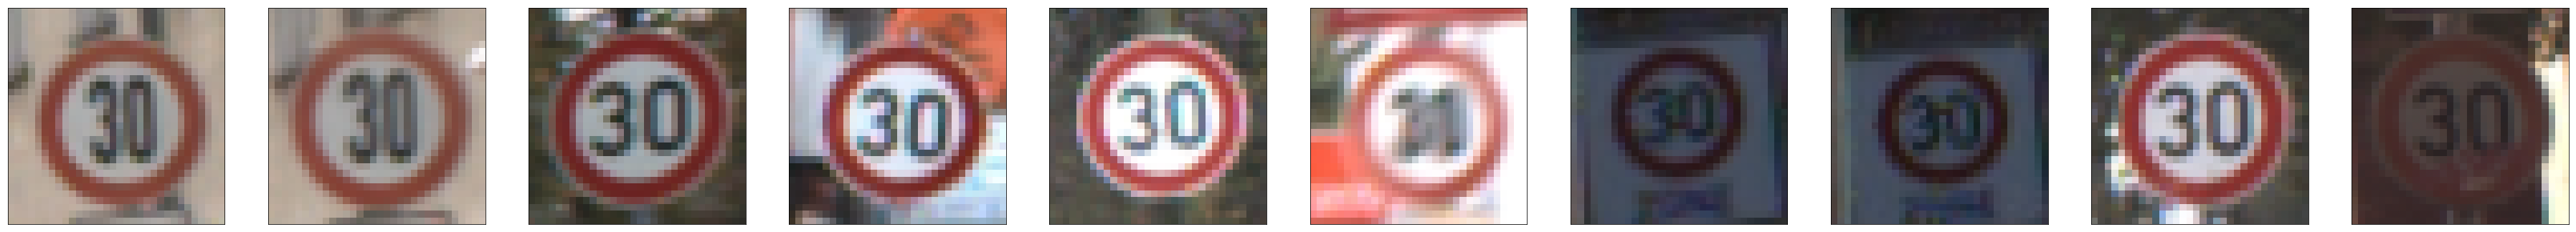

class 2   : Speed limit (50km/h)                 2010 samples


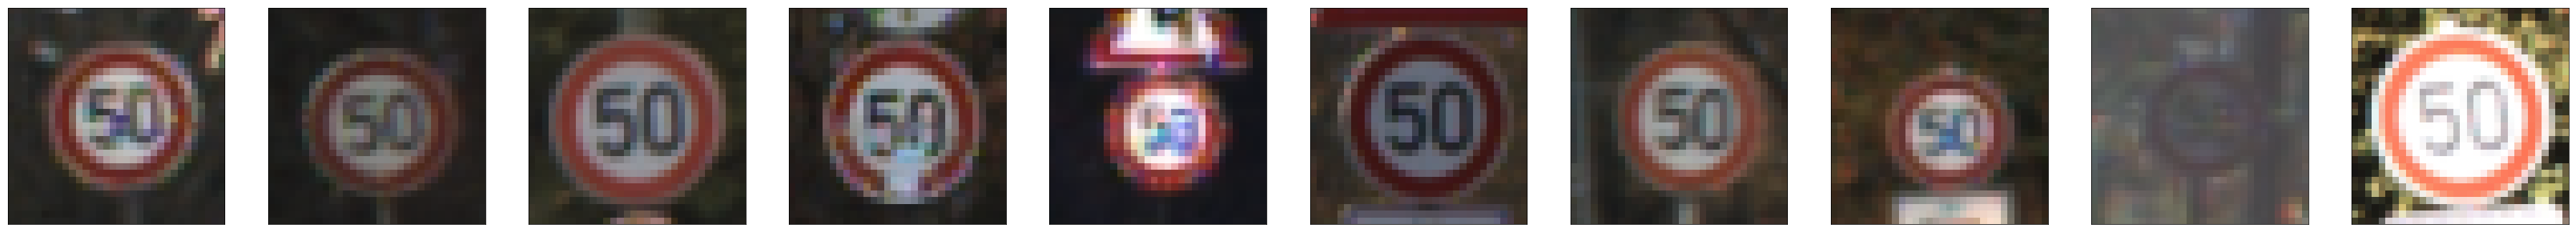

class 3   : Speed limit (60km/h)                 1260 samples


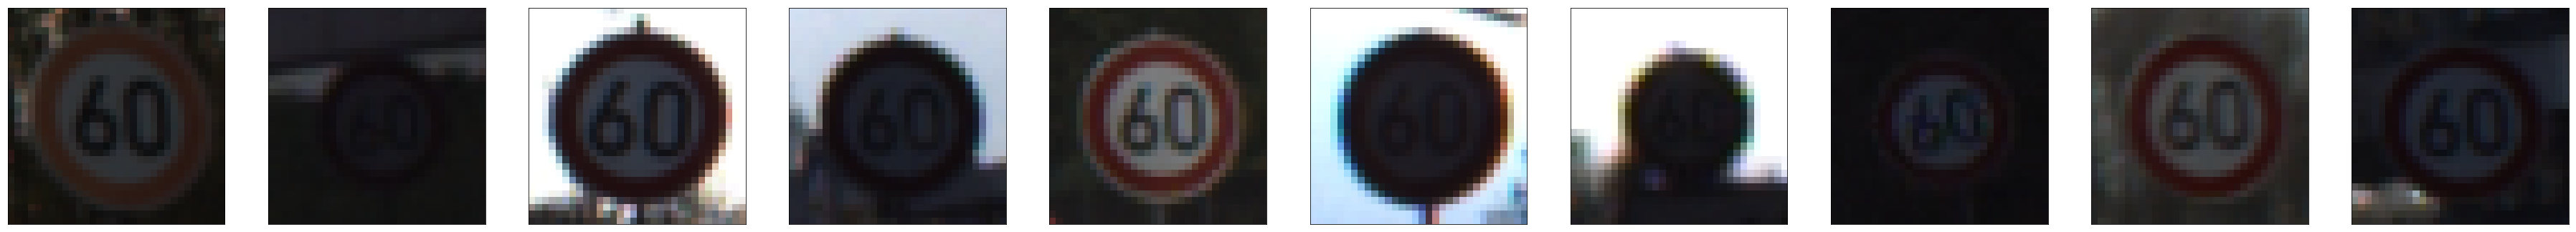

class 4   : Speed limit (70km/h)                 1770 samples


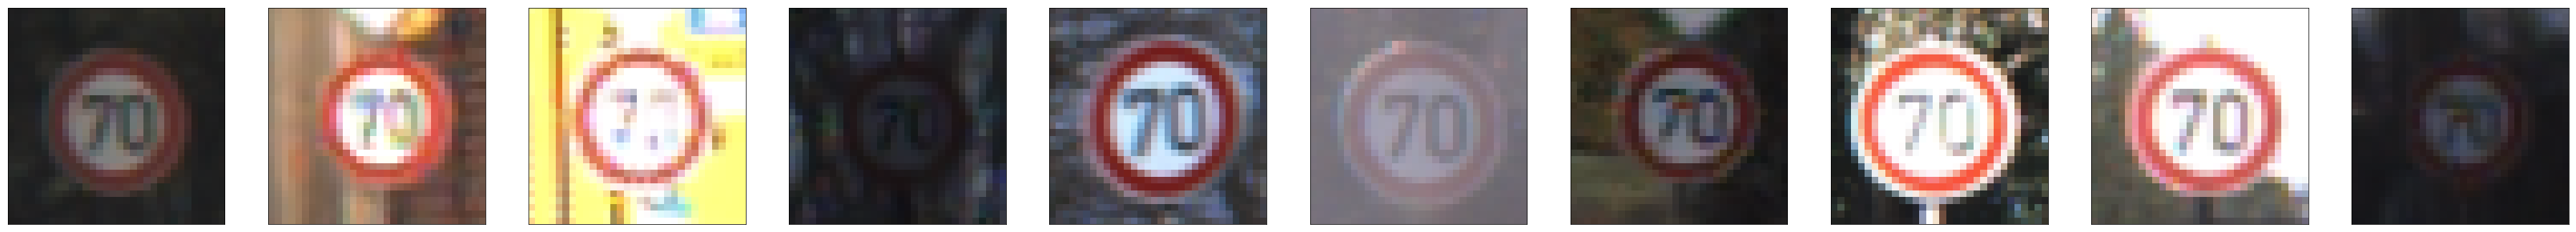

class 5   : Speed limit (80km/h)                 1650 samples


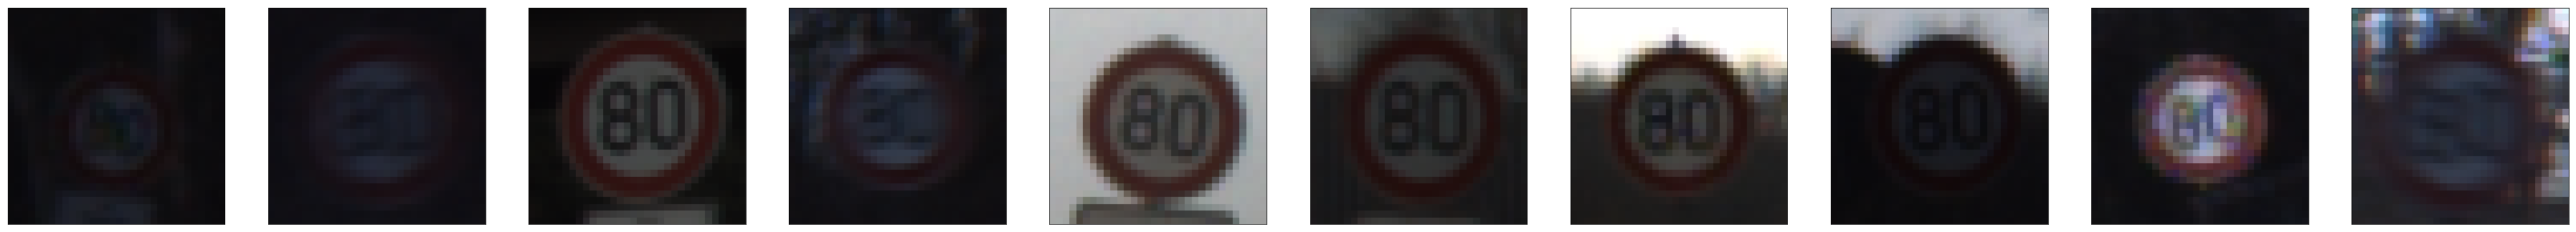

class 6   : End of speed limit (80km/h)                  360 samples


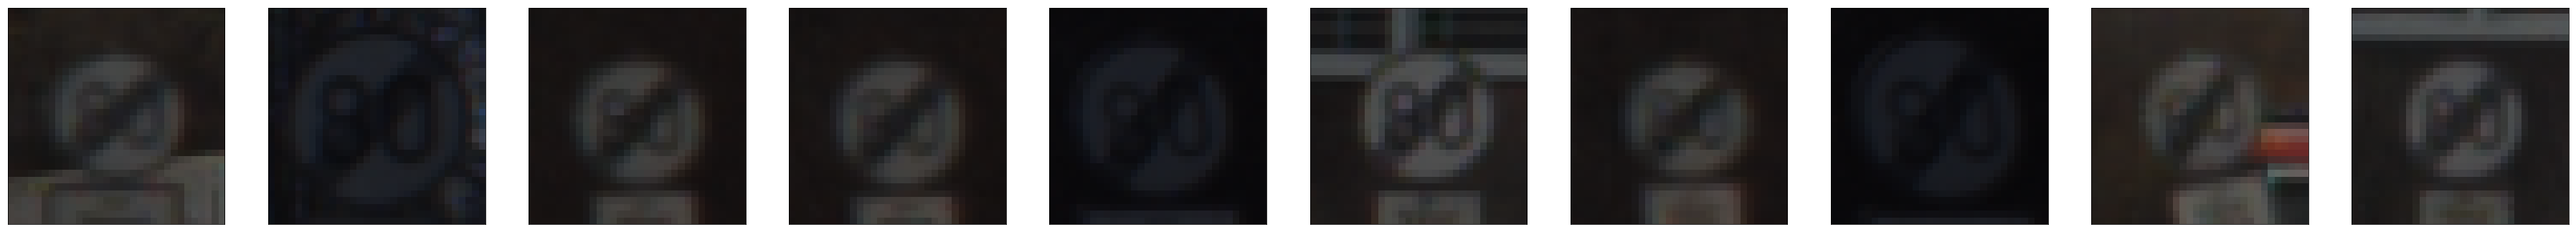

class 7   : Speed limit (100km/h)                 1290 samples


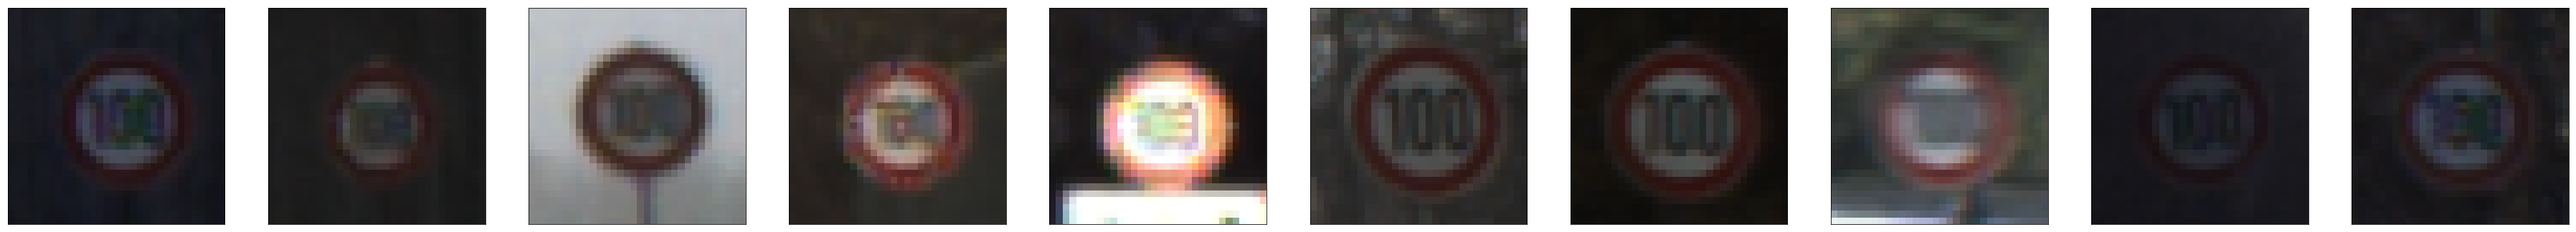

class 8   : Speed limit (120km/h)                 1260 samples


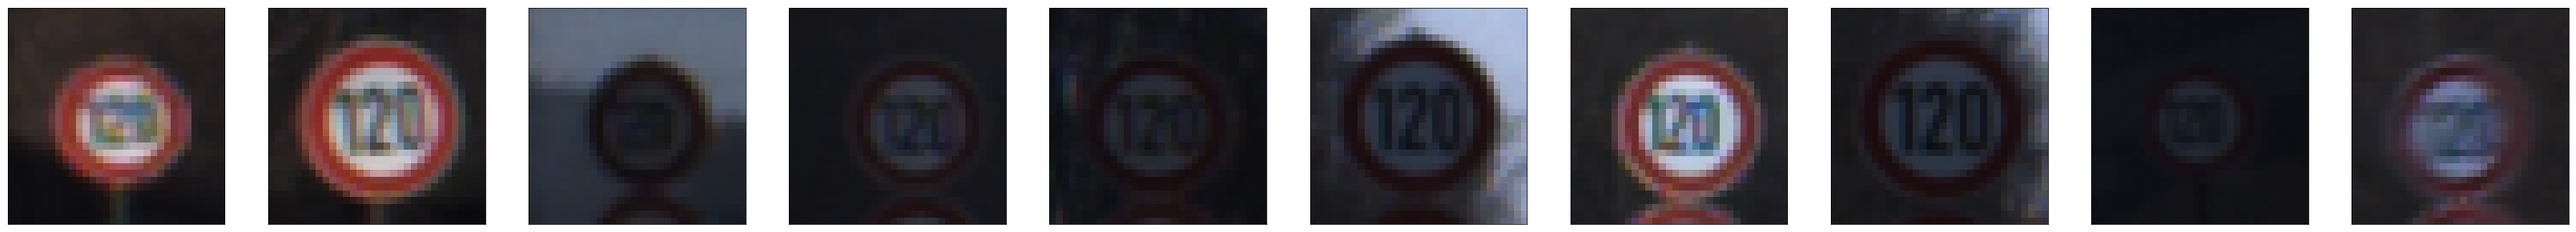

class 9   : No passing                 1320 samples


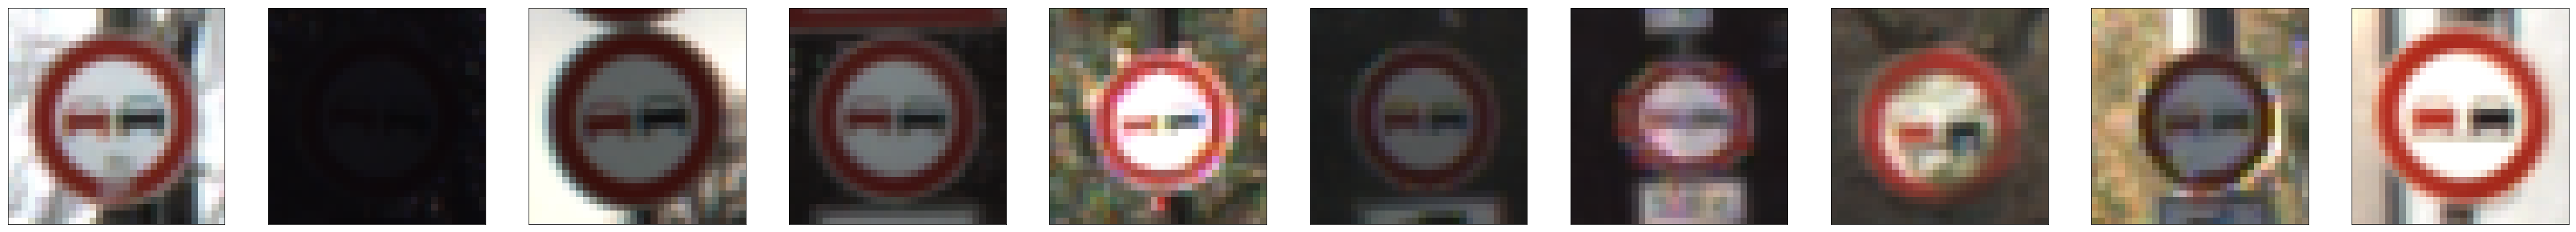

class 10  : No passing for vehicles over 3.5 metric tons                 1800 samples


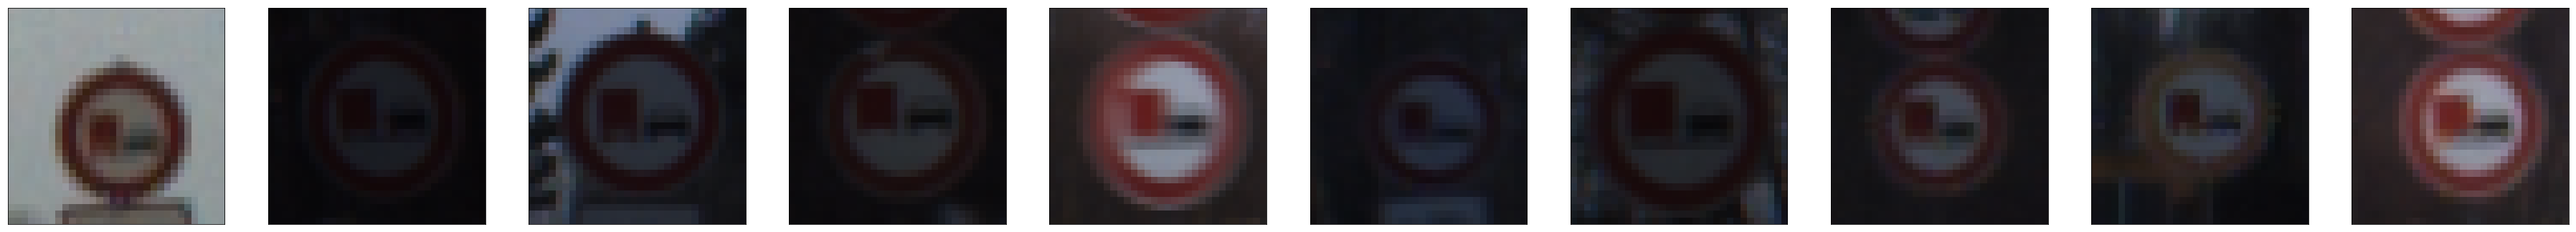

class 11  : Right-of-way at the next intersection                 1170 samples


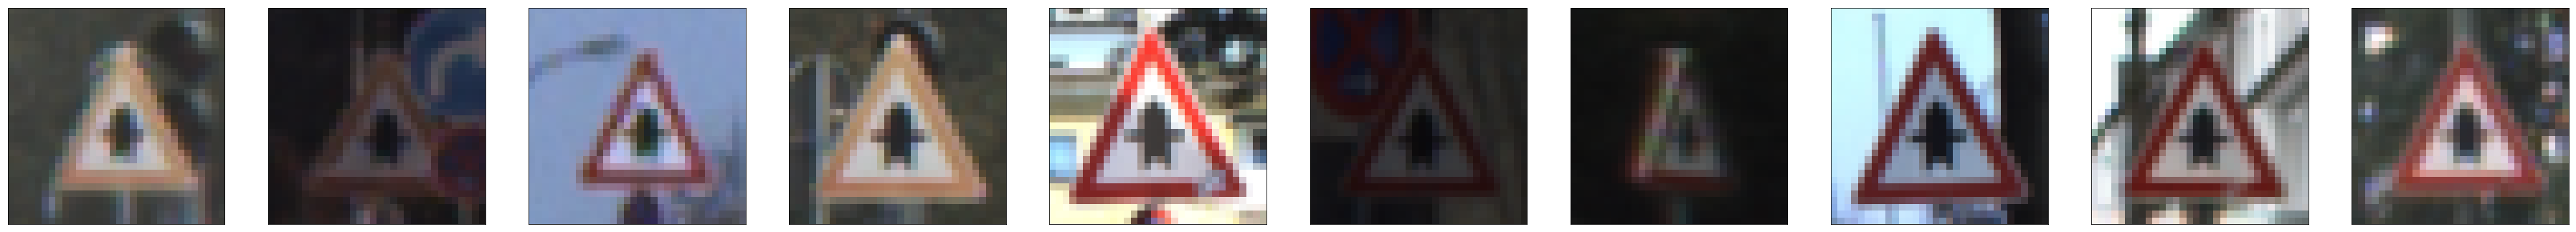

class 12  : Priority road                 1890 samples


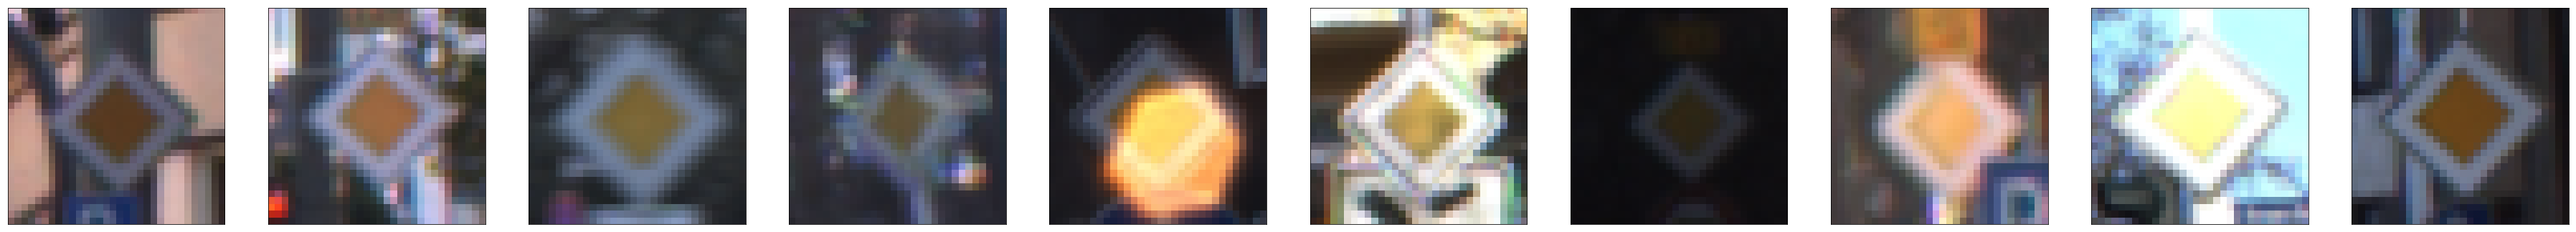

class 13  : Yield                  1920 samples


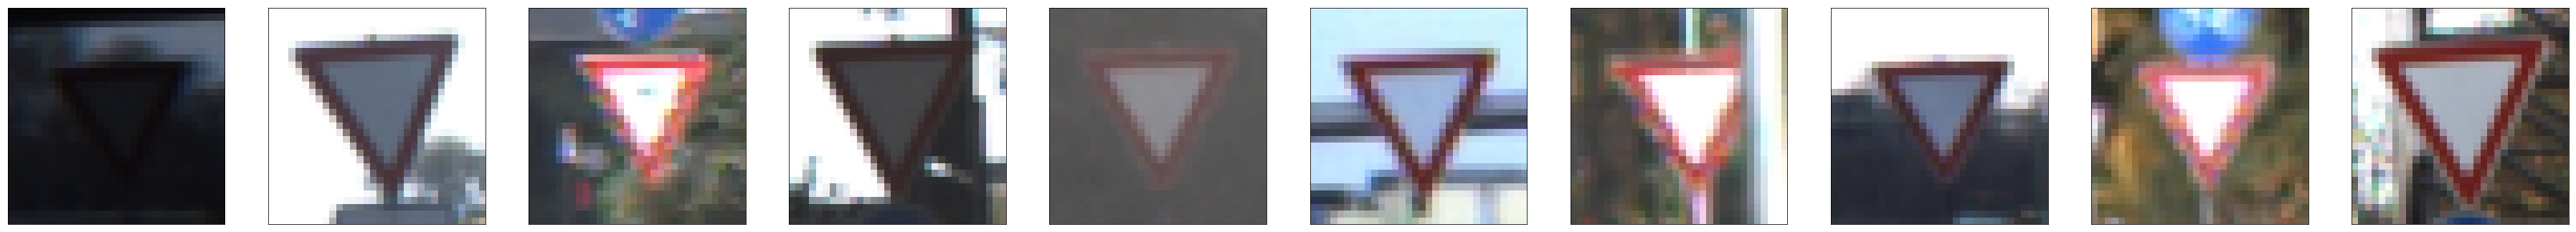

class 14  : Stop                    690 samples


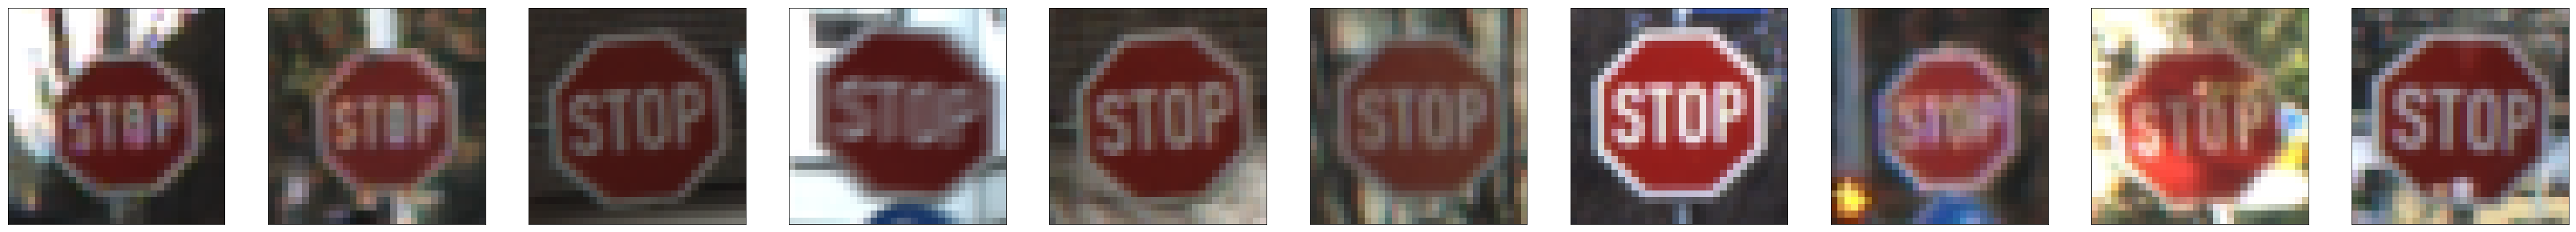

class 15  : No vehicles                  540 samples


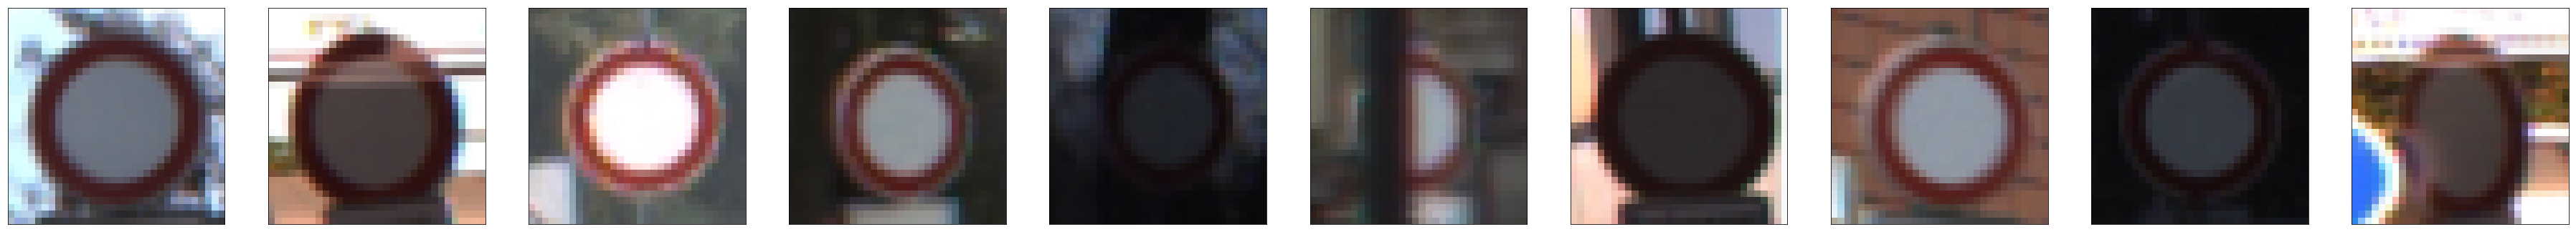

class 16  : Vehicles over 3.5 metric tons prohibited                  360 samples


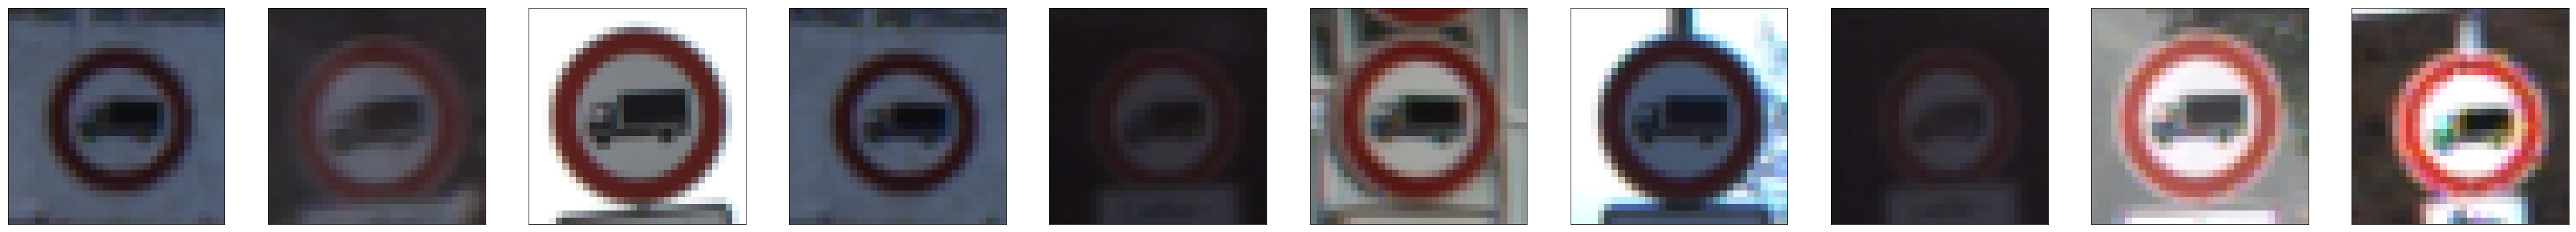

class 17  : No entry                  990 samples


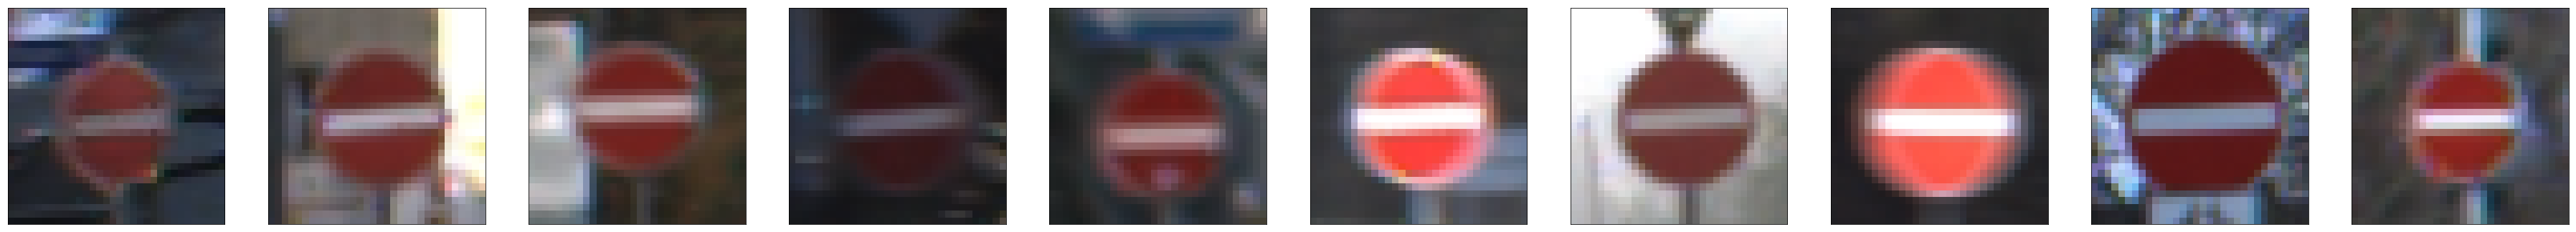

class 18  : General caution                 1080 samples


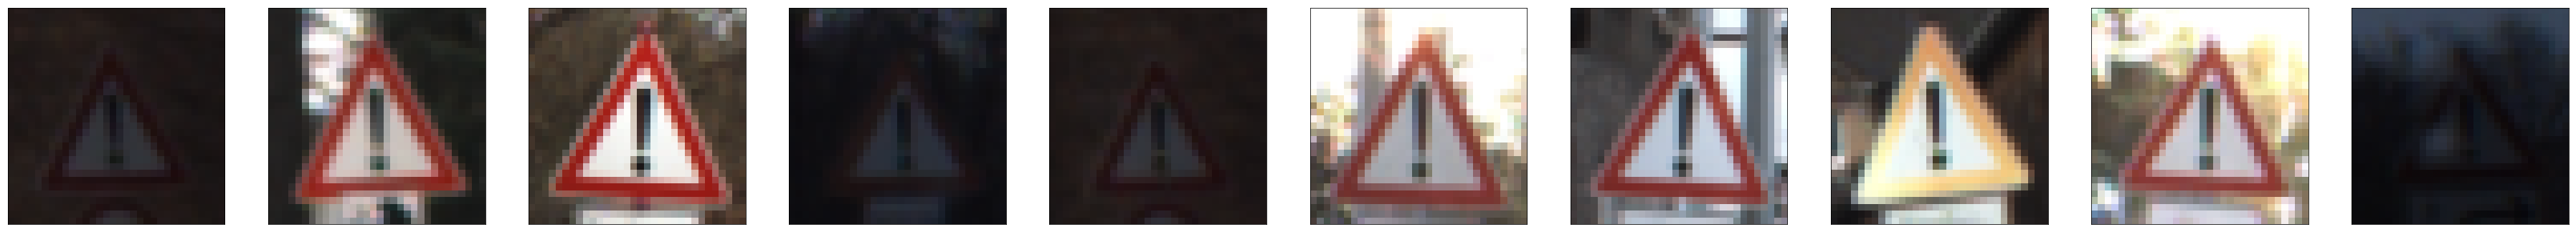

class 19  : Dangerous curve to the left                  180 samples


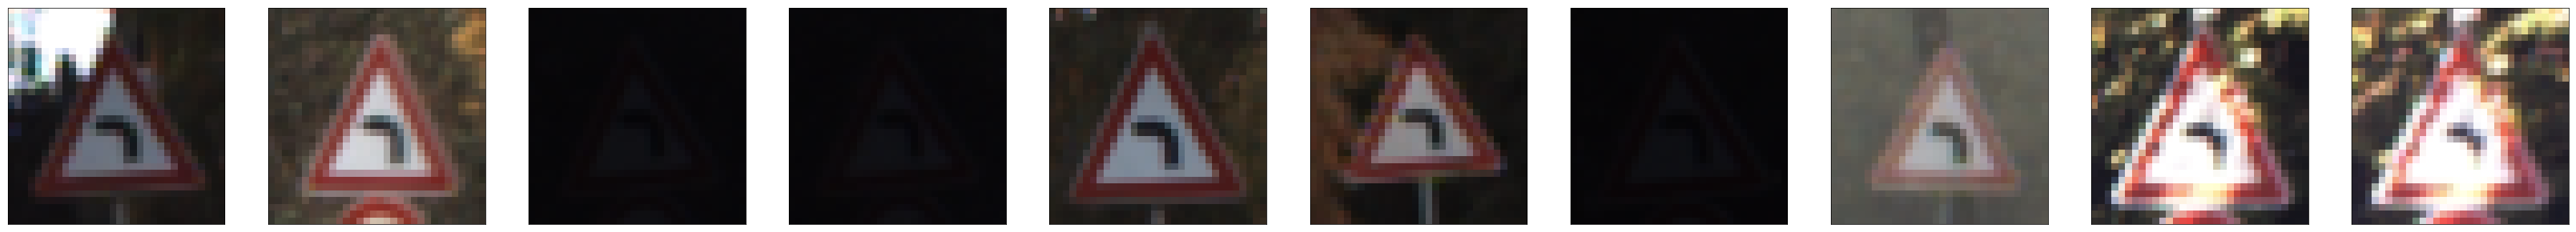

class 20  : Dangerous curve to the right                  300 samples


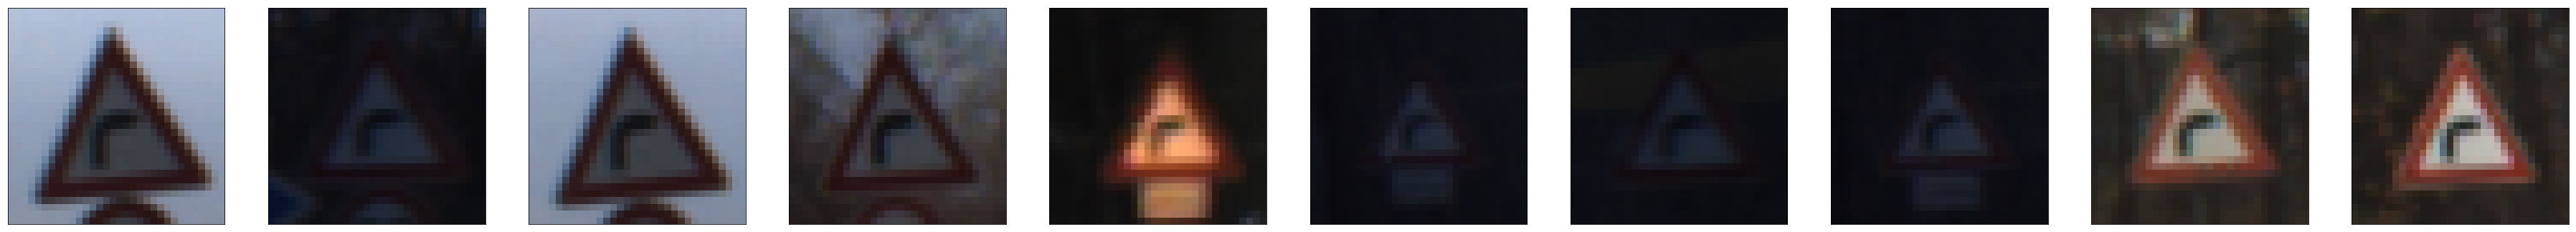

class 21  : Double curve                  270 samples


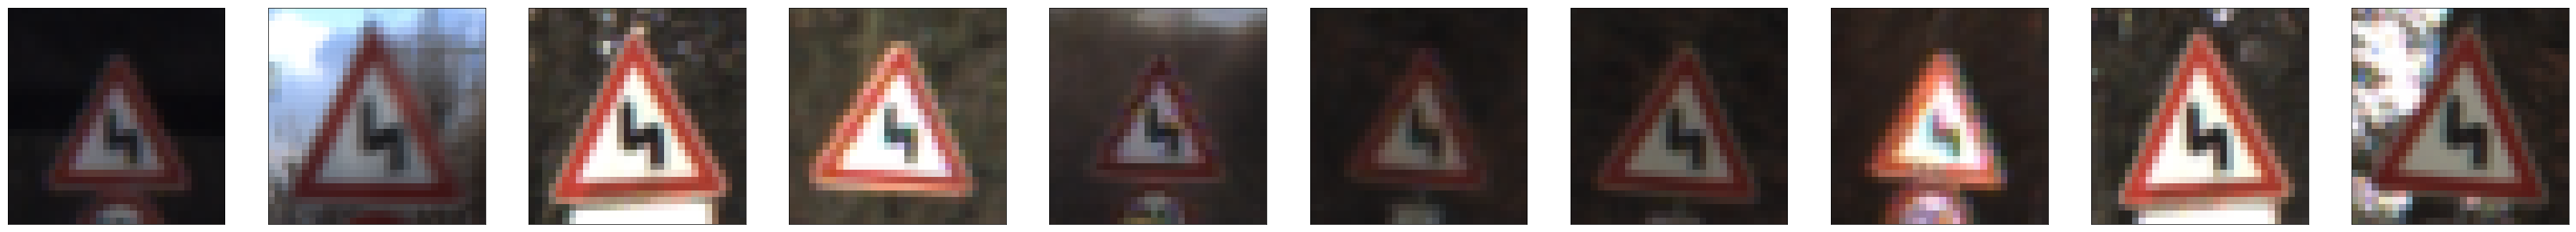

class 22  : Bumpy road                  330 samples


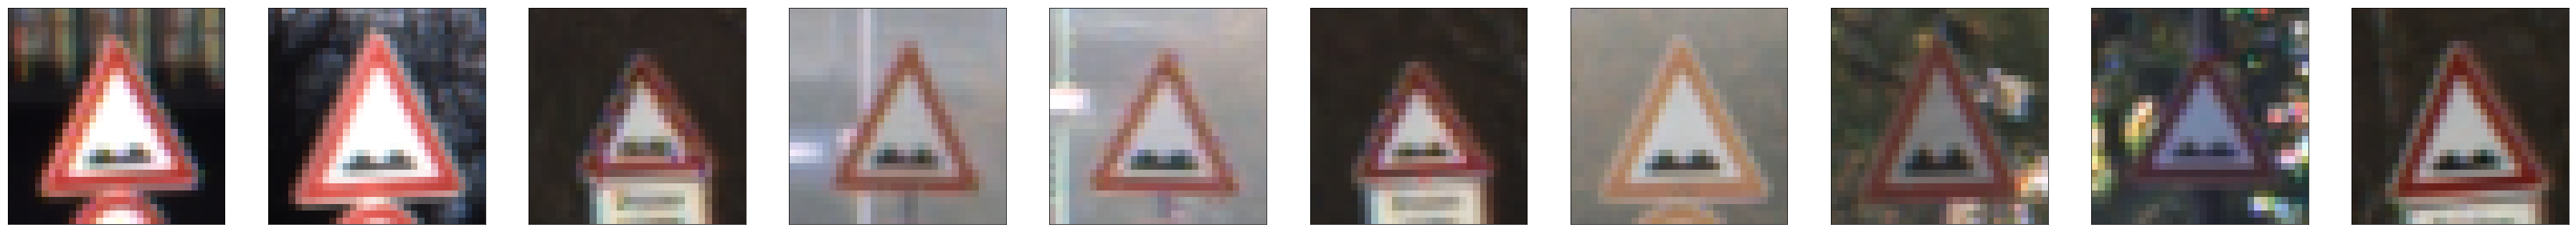

class 23  : Slippery road                  450 samples


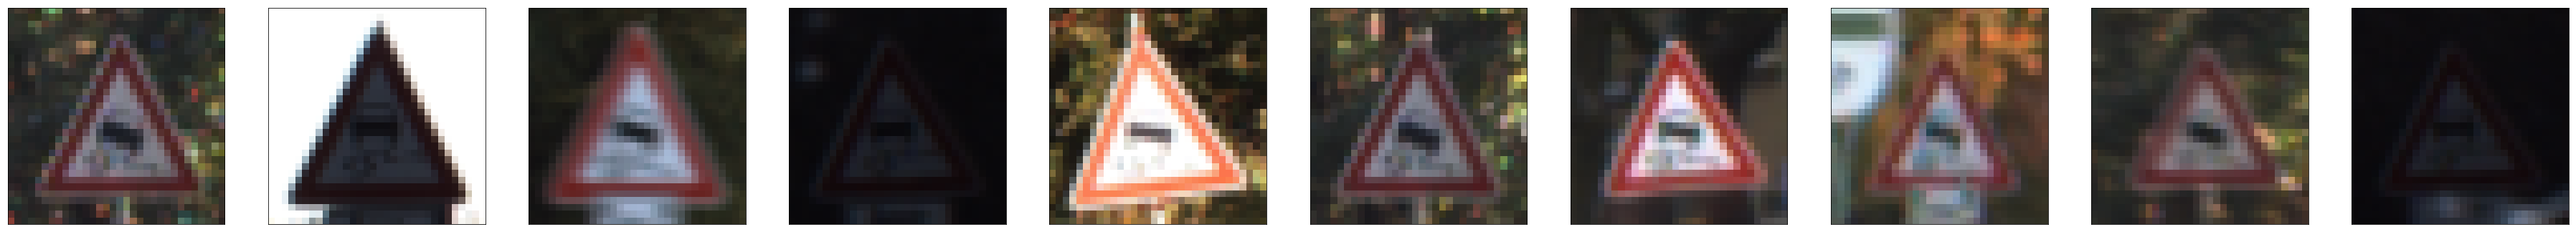

class 24  : Road narrows on the right                  240 samples


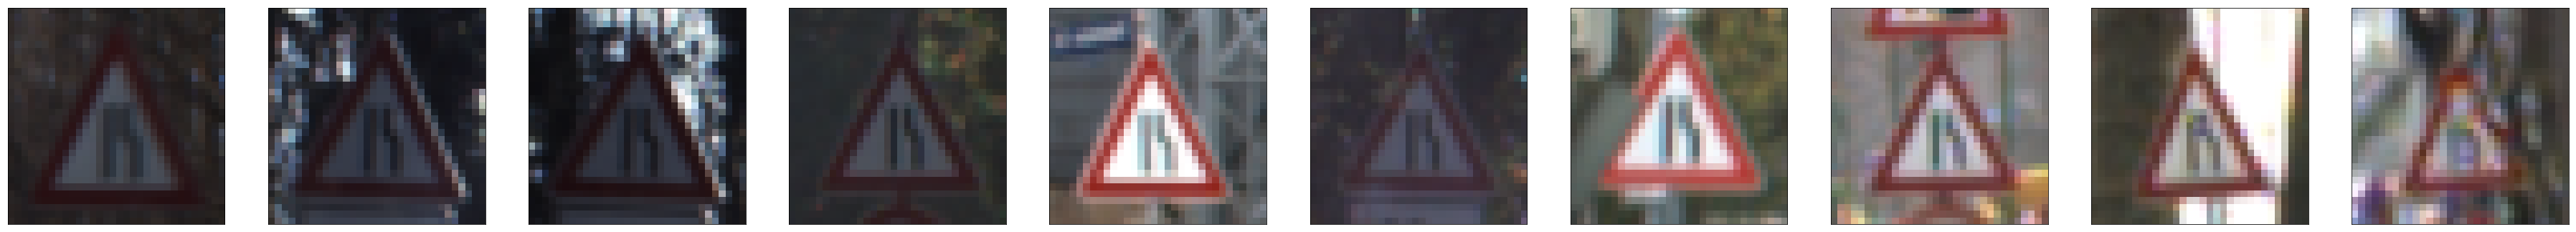

class 25  : Road work                 1350 samples


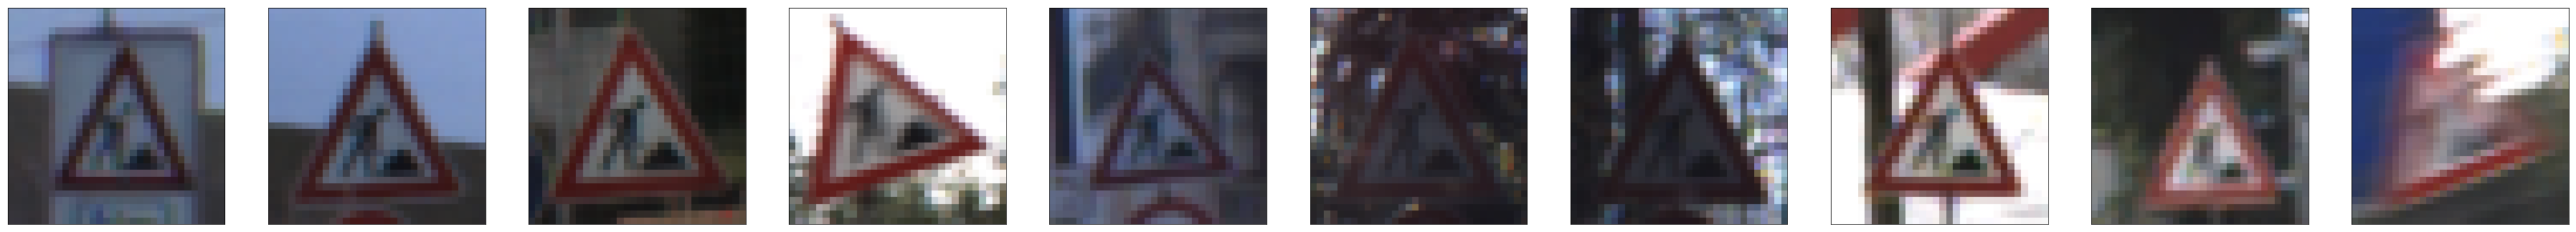

class 26  : Traffic signals                  540 samples


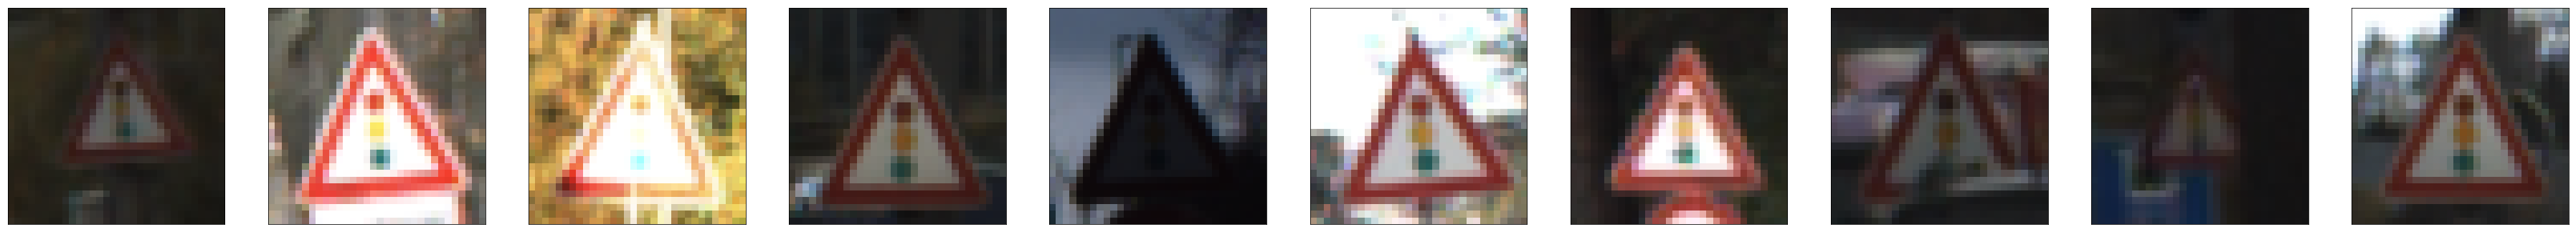

class 27  : Pedestrians                  210 samples


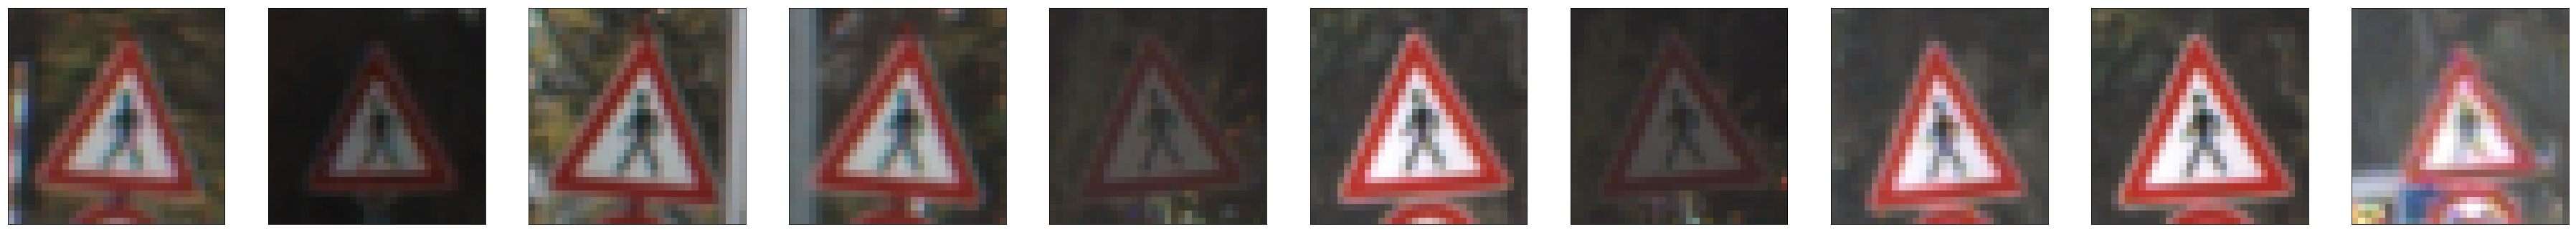

class 28  : Children crossing                  480 samples


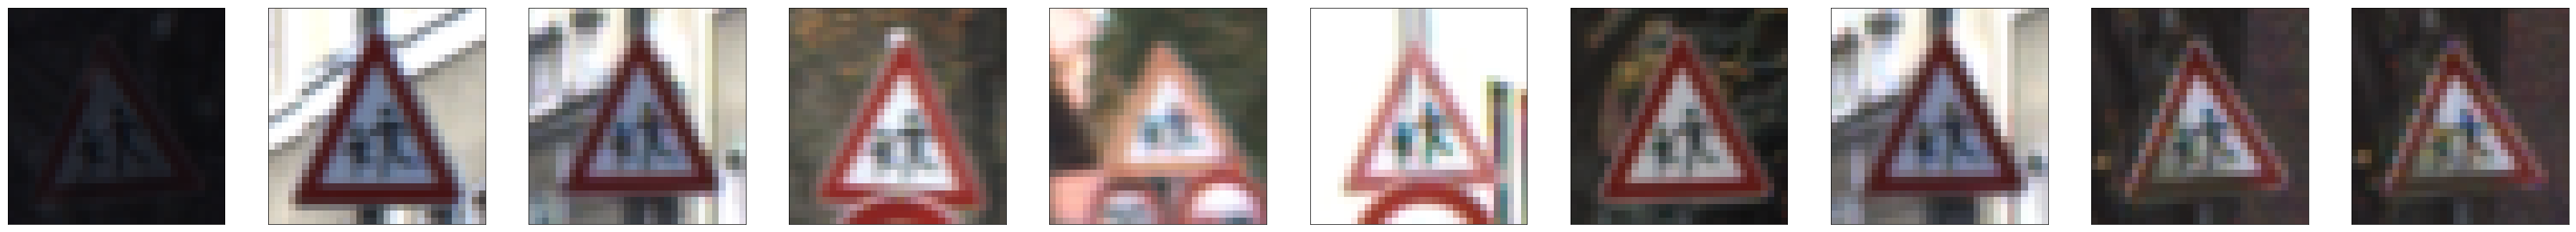

class 29  : Bicycles crossing                  240 samples


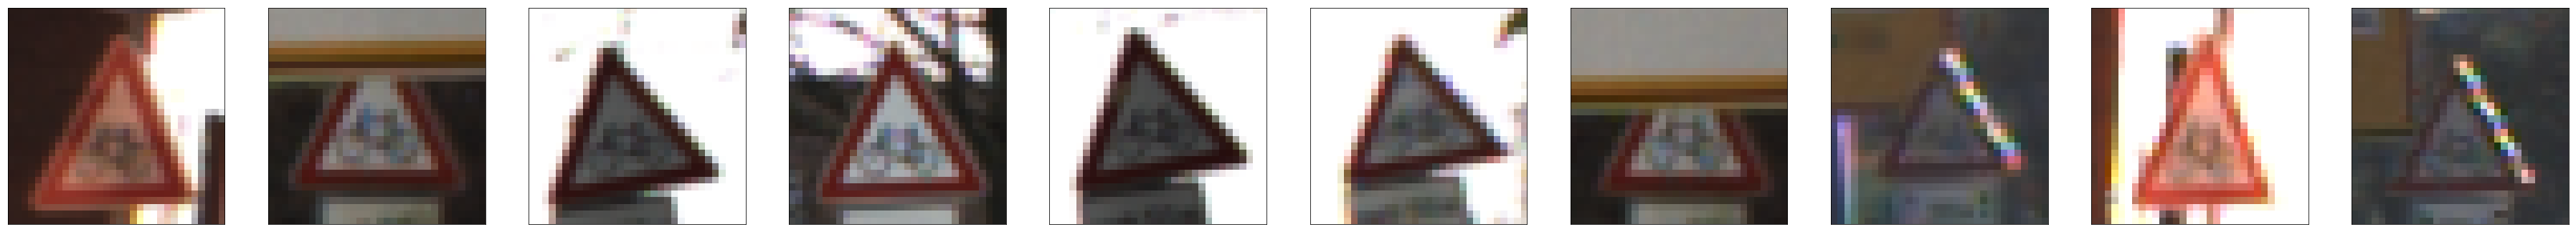

class 30  : Beware of ice/snow                  390 samples


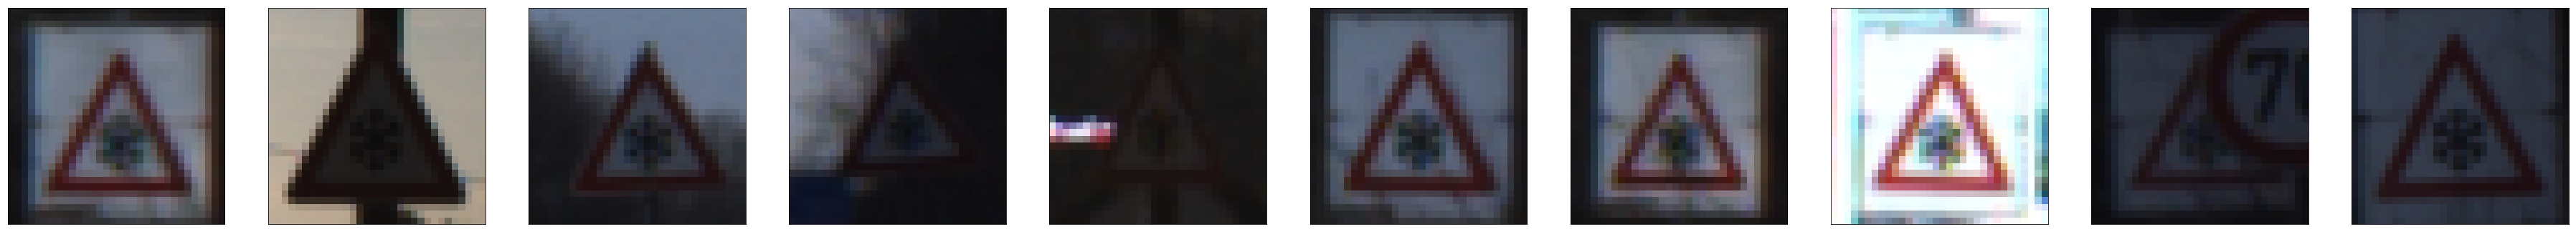

class 31  : Wild animals crossing                  690 samples


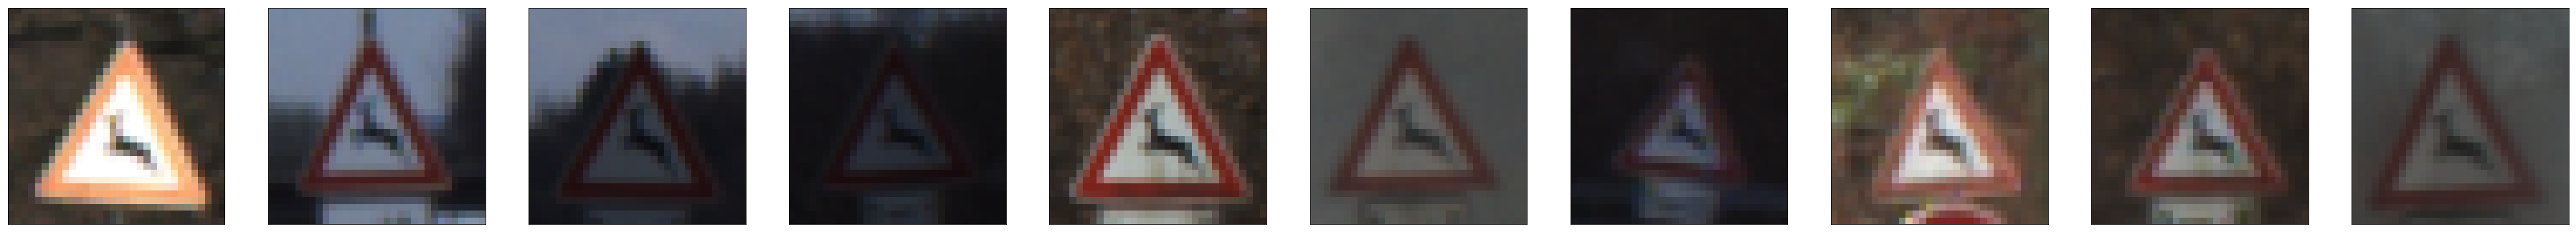

class 32  : End of all speed and passing limits                  210 samples


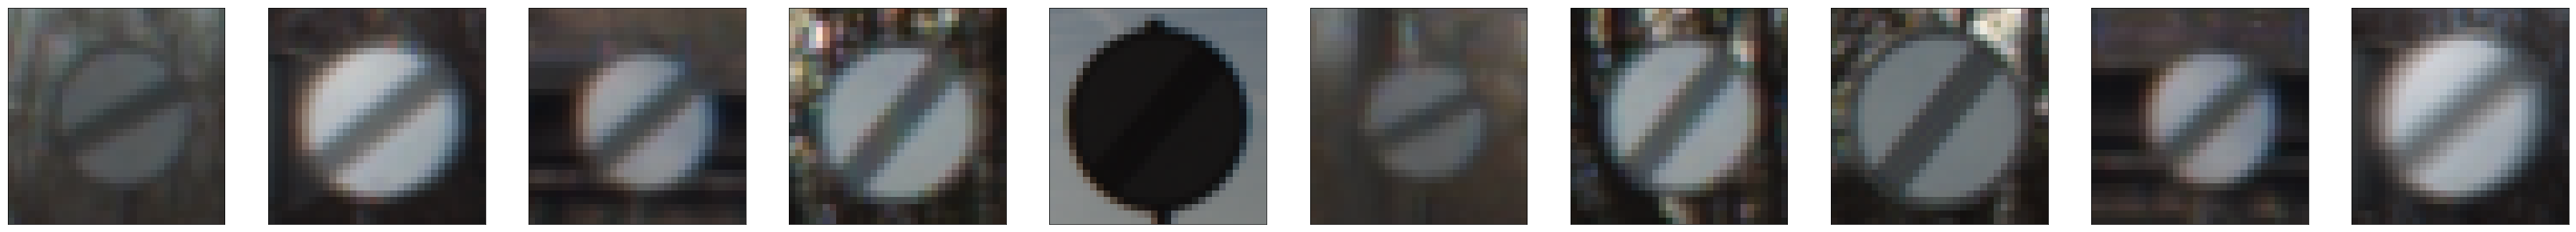

class 33  : Turn right ahead                  599 samples


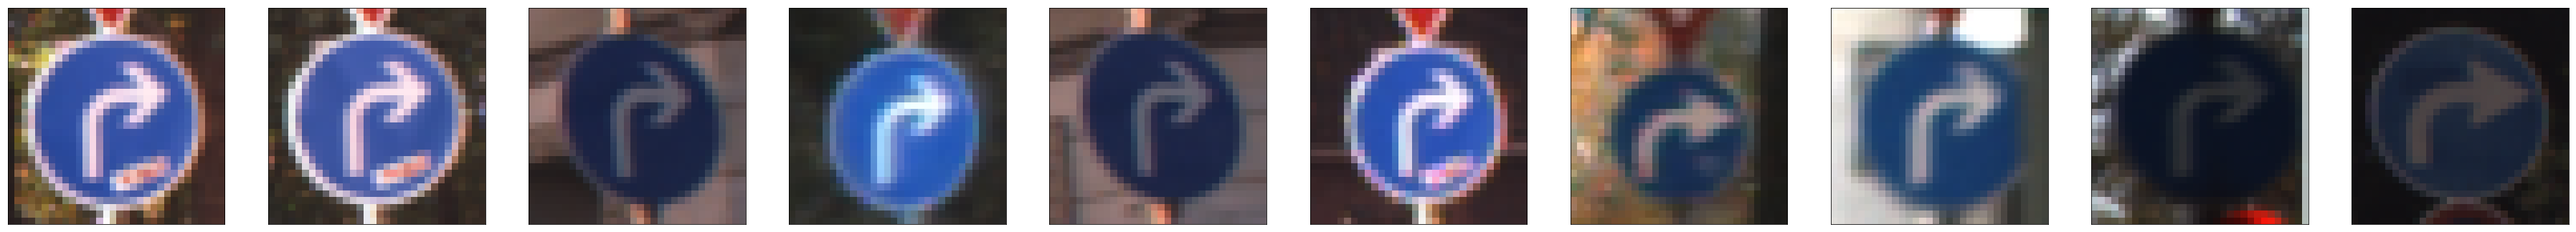

class 34  : Turn left ahead                  360 samples


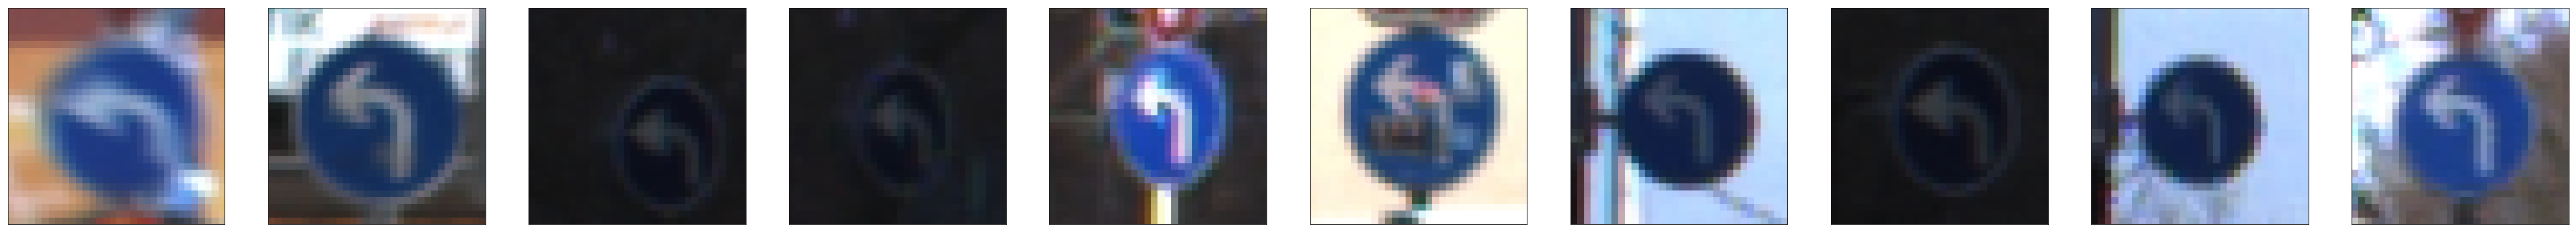

class 35  : Ahead only                 1080 samples


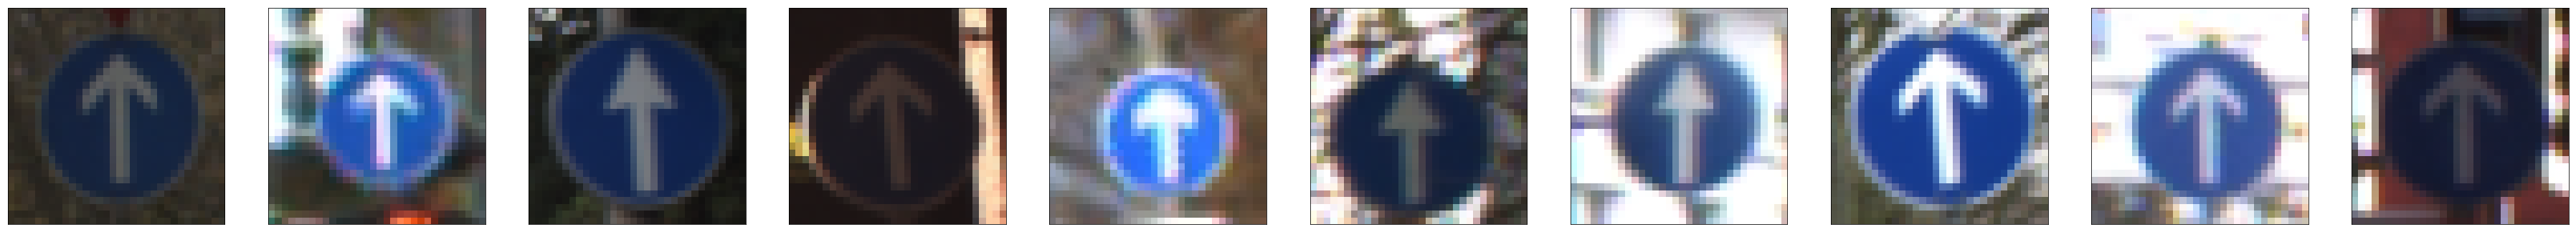

class 36  : Go straight or right                  330 samples


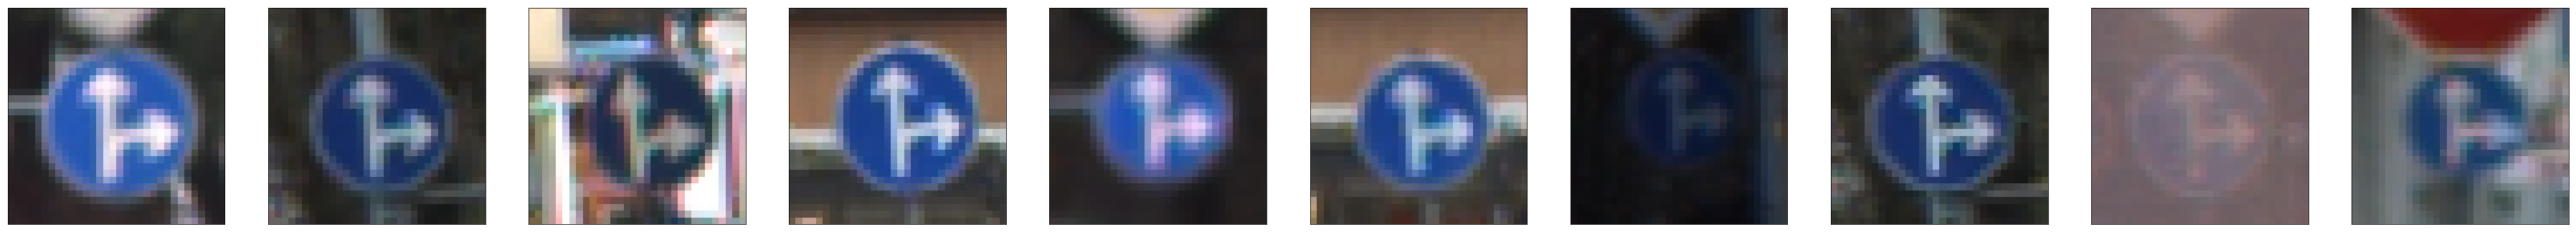

class 37  : Go straight or left                  180 samples


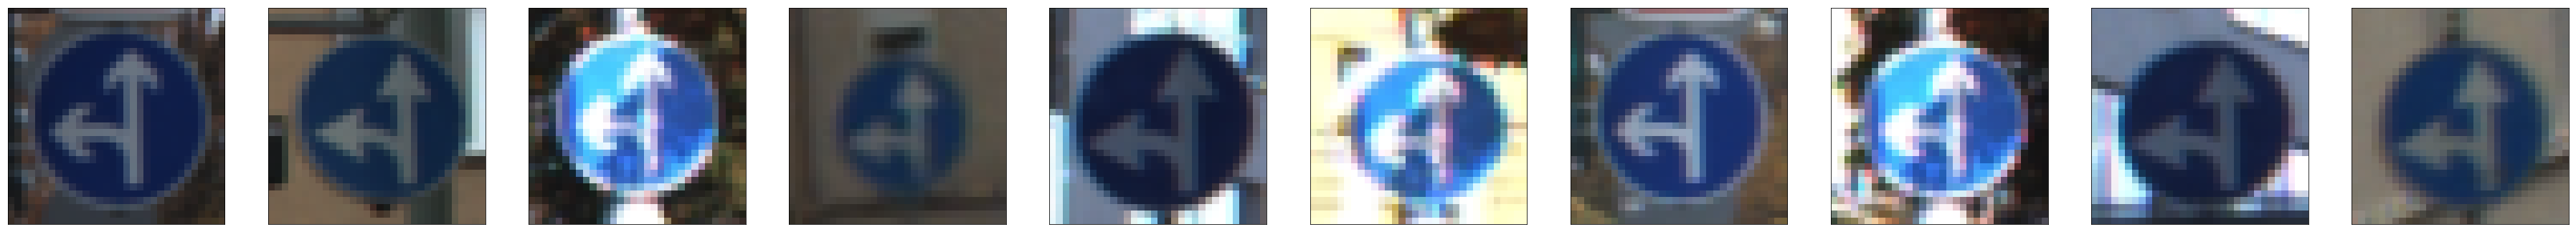

class 38  : Keep right                 1860 samples


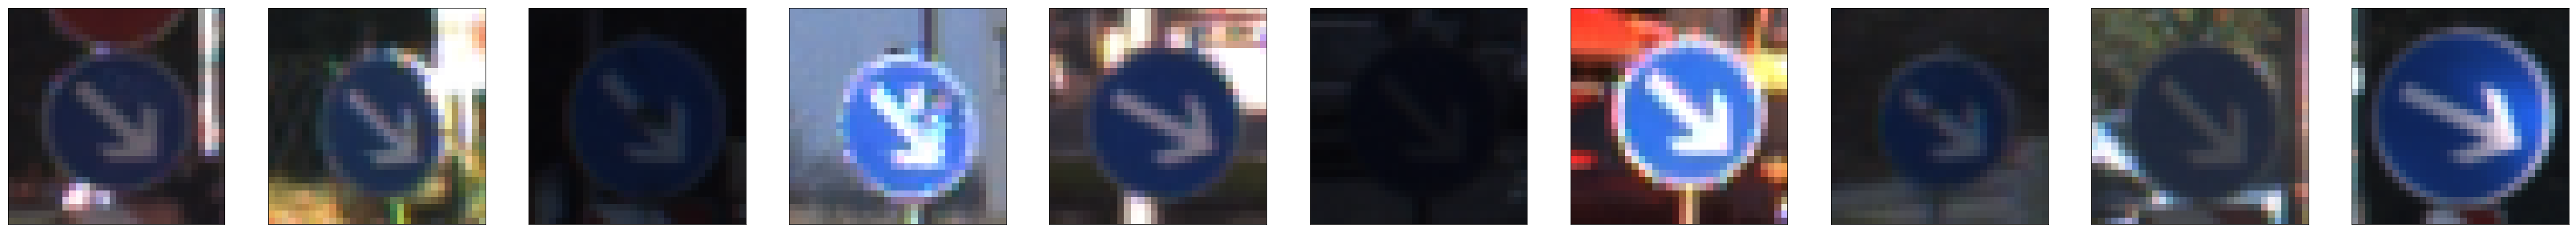

class 39  : Keep left                  270 samples


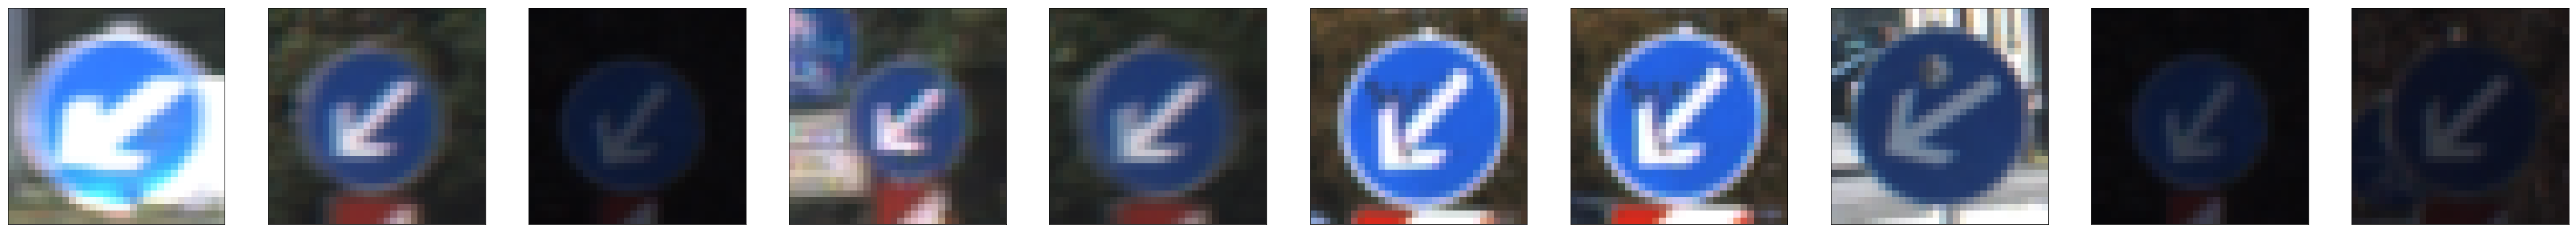

class 40  : Roundabout mandatory                  300 samples


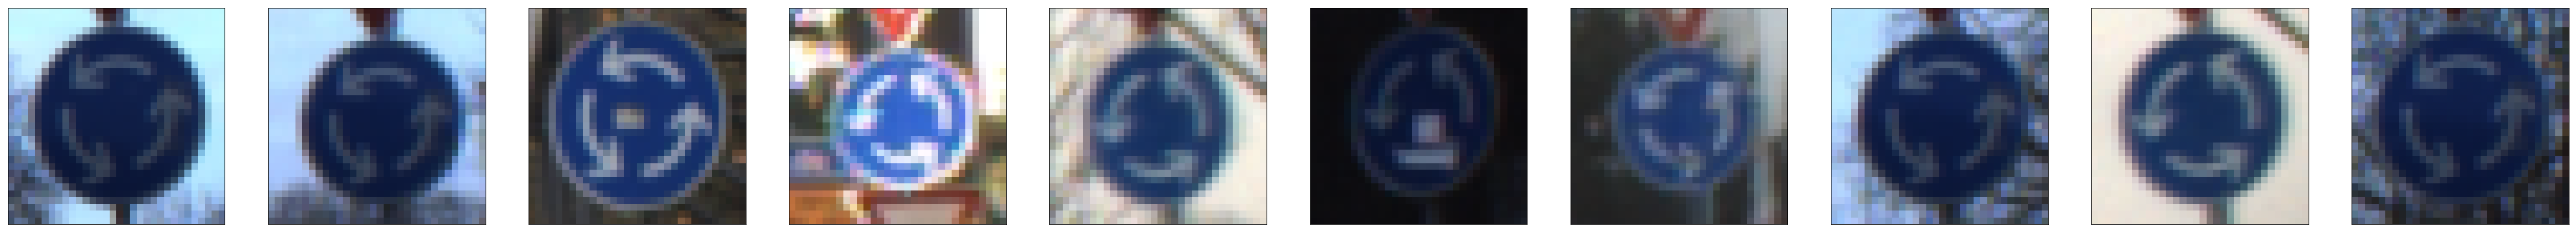

class 41  : End of no passing                  210 samples


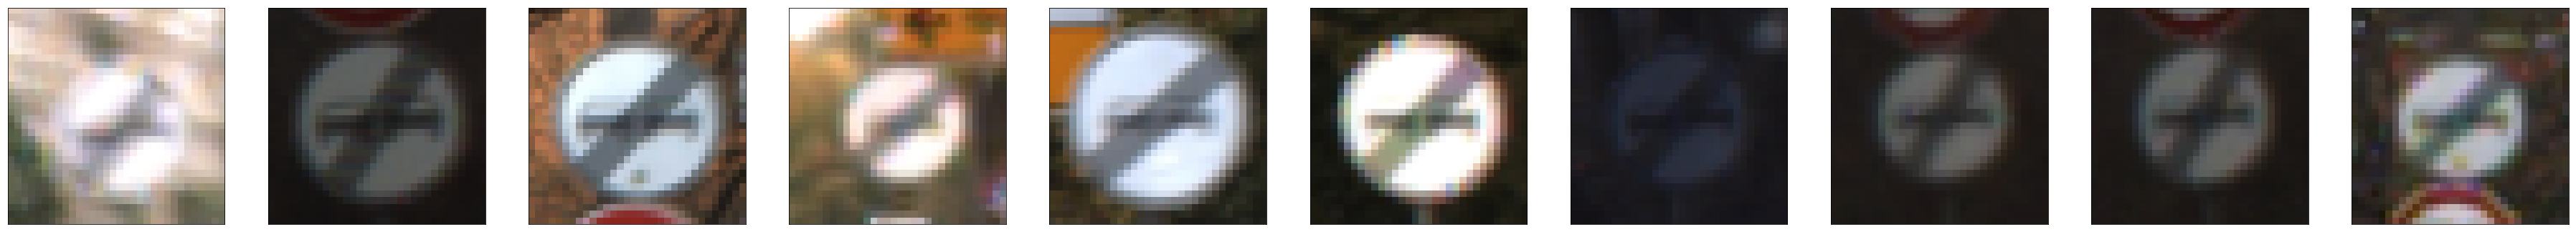

class 42  : End of no passing by vehicles over 3.5 metric tons                  210 samples


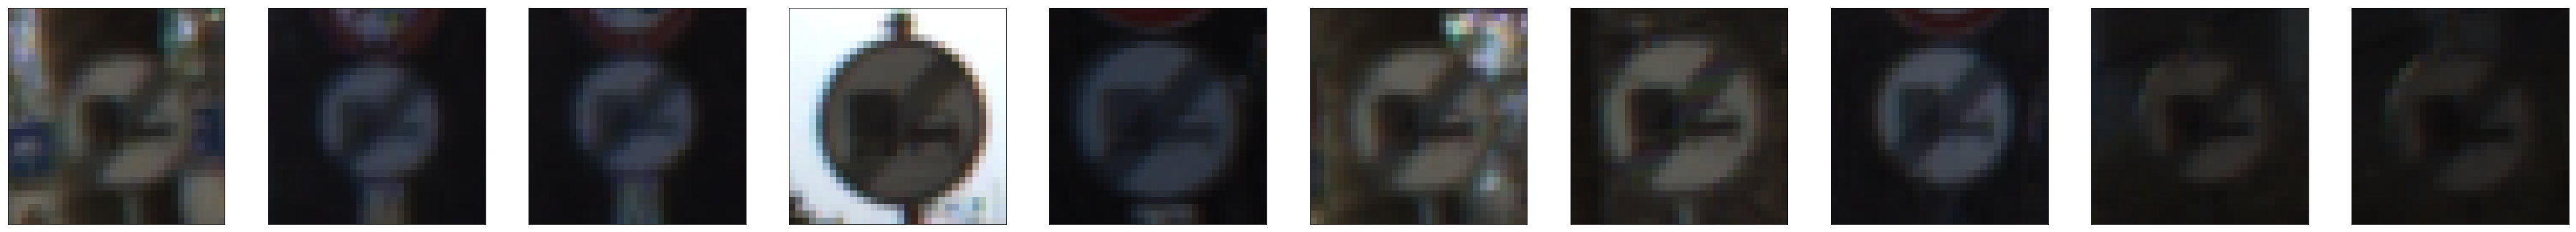

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline
def plot_images(images, image_names, true_image_indicies, samples_in_classes):
    assert len(image_names) == len(true_image_indicies)
    assert len(image_names) == len(samples_in_classes)
    img_shape = (images.shape[1], images.shape[2])
    
    
    sizeOnScreen=(images[0].shape[0]*2, images[1].shape[1]*2)
    #print ("images[0].shape:",images[0].shape, ", sizeOnScreen:", sizeOnScreen)
    for image_name_index, true_image_index, samples_in_class in zip(image_names, true_image_indicies, samples_in_classes):
        #print ("true_image_index:", true_image_index,", samples_in_class:", samples_in_class)
        print("class {:<4}: {:<6} {:>20} samples".format(image_name_index, image_names[image_name_index], samples_in_class))
        plt.figure(image_name_index+1, figsize=sizeOnScreen)
       # 10 random image indices
        randomImageIndicies=random.sample(range(true_image_index,true_image_index+samples_in_class), 10)
        for imageIndex in range(10):
            imageToPlot=images[randomImageIndicies[imageIndex]]
            plt.subplot(1,10,imageIndex+1, xticks=[], yticks=[])
            plt.imshow(imageToPlot)
        plt.show()
        plt.close()
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    #plt.show()
    
plot_images(X_train, signNameDictionary, training_indicies, training_classCounts)



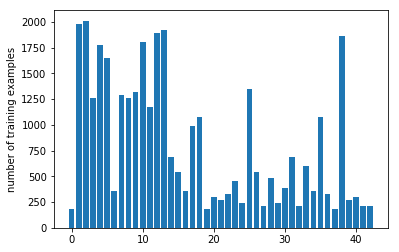

In [4]:
from matplotlib import pyplot
pyplot.bar(np.arange(43), training_classCounts, align="center")
pyplot.xlabel=("class")
pyplot.ylabel("number of training examples")
pyplot.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def normalize(image):
    normalizedImage = np.ndarray(image.shape, np.float)
    #print ("image:", image)
    normalizedImage[:,:,:,0:image.shape[3]] = (image[:,:,:,0:image.shape[3]].astype(float)-128.)/128.
    return normalizedImage

#print ("X_train[0]:", X_train[0])
N_train=normalize(X_train)
#print ("N_train[0]:", N_train[0])
print ("N_trail.shape;", N_train.shape, ", N_train[0] mean:", np.mean(N_train[0]), ", N_train[0] variance:", np.var(N_train[0]) )

N_trail.shape; (34799, 32, 32, 3) , N_train[0] mean: -0.657173156738 , N_train[0] variance: 0.036766610671


threeChannels shape: (32, 32, 3) , type: <class 'numpy.ndarray'> -> uint8


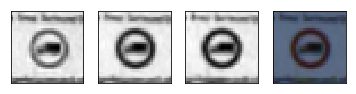

5288 -> 16 , shape: (32, 32)
cannyEdges shape: (32, 32)
fourChannels shape: (32, 32, 4)


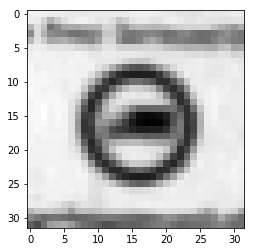

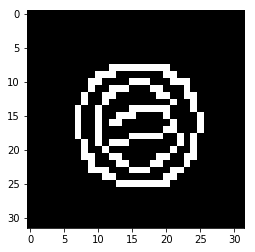

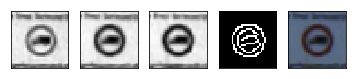

In [6]:
import cv2
import random
import matplotlib.pyplot as plt

def convertToGrayscale(image):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    # return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    return cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

def findCannyEdges(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def findHoughLines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    #Python: cv2.HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]]) → lines
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    drawLines(line_img, lines)
    return lines, line_img

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def combineImages(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

randomIndex = random.randint(0, len(X_train))
threeChannels= X_train[randomIndex].copy()
print("threeChannels shape:",threeChannels.shape,", type:",type(threeChannels),"->", threeChannels.dtype)
plt.figure(1)
plt.subplot(1,4,1, xticks=[], yticks=[])
plt.imshow(threeChannels[:,:,0], cmap='gray')
plt.subplot(1,4,2, xticks=[], yticks=[])
plt.imshow(threeChannels[:,:,1], cmap='gray')
plt.subplot(1,4,3, xticks=[], yticks=[])
plt.imshow(threeChannels[:,:,2], cmap='gray')
plt.subplot(1,4,4, xticks=[], yticks=[])
plt.imshow(threeChannels)
plt.show()
#print("threeChannels:",threeChannels)

grayscaleImage=convertToGrayscale(threeChannels)
plt.figure(2)
plt.imshow(grayscaleImage, cmap='gray')
#plt.imshow(X_train[index])
print(randomIndex,"->",y_train[randomIndex],", shape:", grayscaleImage.shape)
cannyEdges=findCannyEdges(grayscaleImage, 0, 255)
print("cannyEdges shape:", cannyEdges.shape)
plt.figure(3)
plt.imshow(cannyEdges, cmap='gray')
fourChannels=np.ndarray([32,32,4], dtype=np.uint8)
fourChannels[:,:,0:3]=threeChannels[:,:,:]
fourChannels[:,:,3]=cannyEdges
print("fourChannels shape:",fourChannels.shape)
#print("fourChannels:",fourChannels)
plt.figure(4)
plt.subplot(1,5,1, xticks=[], yticks=[])
plt.imshow(fourChannels[:,:,0], cmap='gray')
plt.subplot(1,5,2, xticks=[], yticks=[])
plt.imshow(fourChannels[:,:,1], cmap='gray')
plt.subplot(1,5,3, xticks=[], yticks=[])
plt.imshow(fourChannels[:,:,2], cmap='gray')
plt.subplot(1,5,4, xticks=[], yticks=[])
plt.imshow(fourChannels[:,:,3], cmap='gray')
plt.subplot(1,5,5, xticks=[], yticks=[])
plt.imshow(fourChannels[:,:,0:3])
plt.show()

fourChannelImages shape: (34799, 32, 32, 4)


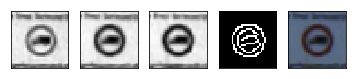

NX_train shape: (34799, 32, 32, 4) , INPUT_CHANNELS: 4
NX_valid shape: (4410, 32, 32, 4)


In [7]:
def addCannyChannel(images):
    #print("images shape:", images.shape)
    numberOfImages=images.shape[0]
    fourChannels=np.ndarray([numberOfImages,32,32,4], dtype=np.uint8)
    fourChannels[:,:,:,0:3]=images[:,:,:,:]
    for imageNumber in range(numberOfImages):
        grayscaleImage=convertToGrayscale(images[imageNumber])
        cannyEdges=findCannyEdges(grayscaleImage, 0, 255)
        fourChannels[imageNumber,:,:,3]=cannyEdges
    return fourChannels

fourChannelImages=addCannyChannel(X_train)
print("fourChannelImages shape:",fourChannelImages.shape)
plt.figure(1)
plt.subplot(1,5,1, xticks=[], yticks=[])
plt.imshow(fourChannelImages[randomIndex,:,:,0], cmap='gray')
plt.subplot(1,5,2, xticks=[], yticks=[])
plt.imshow(fourChannelImages[randomIndex,:,:,1], cmap='gray')
plt.subplot(1,5,3, xticks=[], yticks=[])
plt.imshow(fourChannelImages[randomIndex,:,:,2], cmap='gray')
plt.subplot(1,5,4, xticks=[], yticks=[])
plt.imshow(fourChannelImages[randomIndex,:,:,3], cmap='gray')
plt.subplot(1,5,5, xticks=[], yticks=[])
plt.imshow(fourChannelImages[randomIndex,:,:,0:3])
plt.show()

#X_train=fourChannelImages
NX_train=normalize(fourChannelImages)
INPUT_CHANNELS=len(NX_train.shape)
print("NX_train shape:",NX_train.shape,", INPUT_CHANNELS:", INPUT_CHANNELS)

def preProcessImages(images):
    return normalize(addCannyChannel(X_valid))

NX_valid=normalize(addCannyChannel(X_valid))
#NX_valid=preProcessImages(X_valid)
print("NX_valid shape:", NX_valid.shape)


In [8]:
from sklearn.utils import shuffle

NX_train, y_train = shuffle(NX_train, y_train)

### Model Architecture

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [9]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [11]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x4. Output = 28x28x12.
    LAYER1_CHANNELS=16
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, INPUT_CHANNELS, LAYER1_CHANNELS), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(LAYER1_CHANNELS))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # tf.nn.local_response_normalization(input, depth_radius=None, bias=None, alpha=None, beta=None, name=None)
    conv1 = tf.nn.local_response_normalization(conv1)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x32.
    LAYER2_CHANNELS=16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, LAYER1_CHANNELS, LAYER2_CHANNELS), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(LAYER2_CHANNELS))
    conv2   = tf.nn.conv2d(pool1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    conv2 = tf.nn.local_response_normalization(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    pool2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(pool2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(5*5*LAYER2_CHANNELS, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1= tf.nn.dropout(fc1, keep_prob)
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2= tf.nn.dropout(fc2, keep_prob)
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [12]:
x = tf.placeholder(tf.float32, (None, 32, 32, INPUT_CHANNELS))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

keep_prob = tf.placeholder(tf.float32)

### Train, Validate and Test the Model

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [13]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    #print("X_data:",X_data," x:", x)
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #print("batch_x shape:",batch_x.shape," x:", x)
        # validation images do not have a 4th channel & the x placeholder is being reused and has a 4th channel
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [16]:
training_accuracy_history=[]
validation_accuracy_history=[]
#carnd@ip-10-67-189-116:~$ nvidia-smi -L
#GPU 0: GRID K520 (UUID: GPU-5eb04f46-3192-2171-00cc-bd55d5162ca9)
with tf.Session() as sess:
    keepProbability=.75
    with tf.device('/cpu:0'):
        sess.run(tf.global_variables_initializer())
        num_examples = len(NX_train)

        print("Training...")
        print()
        for i in range(EPOCHS):
            NX_train, y_train = shuffle(NX_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = NX_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keepProbability})

            training_accuracy = evaluate(NX_train, y_train)
            training_accuracy_history.append(training_accuracy)
            validation_accuracy = evaluate(NX_valid, y_valid)
            validation_accuracy_history.append(validation_accuracy)
            #print("training_accuracy_history:", training_accuracy_history)
            #print("validation_accuracy_history:", validation_accuracy_history)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print("Training Accuracy = {:.3f}".format(training_accuracy))
            print()

    saver.save(sess, './lenet')
    print("Model saved")
    print("training_accuracy_history:", training_accuracy_history)
    print("validation_accuracy_history:", validation_accuracy_history)
    

Training...

EPOCH 1 ...
Validation Accuracy = 0.706
Training Accuracy = 0.762

EPOCH 2 ...
Validation Accuracy = 0.849
Training Accuracy = 0.905

EPOCH 3 ...
Validation Accuracy = 0.906
Training Accuracy = 0.961

EPOCH 4 ...
Validation Accuracy = 0.932
Training Accuracy = 0.972

EPOCH 5 ...
Validation Accuracy = 0.935
Training Accuracy = 0.982

EPOCH 6 ...
Validation Accuracy = 0.940
Training Accuracy = 0.989

EPOCH 7 ...
Validation Accuracy = 0.946
Training Accuracy = 0.991

EPOCH 8 ...
Validation Accuracy = 0.945
Training Accuracy = 0.993

EPOCH 9 ...
Validation Accuracy = 0.948
Training Accuracy = 0.994

EPOCH 10 ...
Validation Accuracy = 0.948
Training Accuracy = 0.996

Model saved
training_accuracy_history: [0.76163108134948676, 0.90502600650985499, 0.96088968082359361, 0.9723555274919421, 0.98186729503721371, 0.98859162621328334, 0.99123538036127745, 0.99287335842983993, 0.99416649905445698, 0.99583321363234845]
validation_accuracy_history: [0.70634920637623788, 0.84943310657596

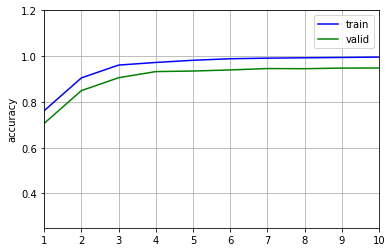

In [17]:
#training_accuracy_history= [0.77255093533402386, 0.92594614780758666]
#validation_accuracy_history= [0.68412698430268948, 0.83469387730773614]
def plotAccuracyHistory(trainingAccuracyHistory, validationAccuracyHistory, lineWidth=2, trainLineStyle="b-", vaidationLineStyle="g-") :
    assert len(trainingAccuracyHistory) == len(validationAccuracyHistory)
    epochs=len(trainingAccuracyHistory)
    xAxis=np.arange(1,epochs+1)
    #print("xAxis:", xAxis)
    accuracyPlot=plt.figure(1)
    plt.grid()
    plt.ylabel('accuracy')
    #plt.xlabel('epoch')
    plt.ylim(.25, 1.2)
    plt.xlim(1, epochs)
    #axis=accuracyPlot.add_subplot(1,1,1)
    #axis.plot(xAxis, trainingAccuracyHistory, trainLineStyle, linewidth=lineWidth, label="train")
    #axis.plot(xAxis, validationAccuracyHistory, vaidationLineStyle, linewidth=lineWidth, label="valid")
    plt.plot(xAxis, trainingAccuracyHistory, trainLineStyle, label="train")
    plt.plot(xAxis, validationAccuracyHistory, vaidationLineStyle, label="valid")
    plt.legend()
    plt.show()
    plt.close()
    
plotAccuracyHistory(training_accuracy_history, validation_accuracy_history)    
    

### Evaluate Test Set

In [21]:
#NX_test=preProcessImages(X_test)
NX_test=normalize(addCannyChannel(X_test))
print("NX_test shape:", NX_test.shape, ", X_test.shape:",X_test.shape,", y_test.shape:",y_test.shape)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(NX_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


NX_test shape: (12630, 32, 32, 4) , X_test.shape: (12630, 32, 32, 3) , y_test.shape: (12630,)
Test Accuracy = 0.946


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [139]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
imageList=["./fromInternet/stop.jpg", "./fromInternet/roadwork.png",  "./fromInternet/OneWayToLeft.png",
           "./fromInternet/NoOvertaking.png",  "./fromInternet/CattleCrossing.png"]
trueClass=np.array([14, 25, 43, 9, 44])
signNameDictionary[43]="One Way To Left (not in training set)"
signNameDictionary[44]="Cattle Crossing (not in training set)"

rgbImage32x32Array=np.ndarray([len(imageList),32,32,3], np.uint8)
for imageId,image in zip(range(len(imageList)), imageList):
    bgrImage = cv2.imread(image)
    print("bgrImage.shape:", bgrImage.shape, ", type:", bgrImage.dtype)
    rgbImage = cv2.cvtColor(bgrImage, cv2.COLOR_BGR2RGB)
    #plt.figure(imageId)
    #plt.subplot(1,2,1)
    #plt.imshow(rgbImage)
    #plt.subplot(1,2,2)
    rgbImage32x32=cv2.resize(rgbImage,dsize=(32,32))
    rgbImage32x32Array[imageId]=rgbImage32x32
    #plt.imshow(rgbImage32x32)
plt.show()
plt.close()


bgrImage.shape: (120, 120, 3) , type: uint8
bgrImage.shape: (106, 120, 3) , type: uint8
bgrImage.shape: (44, 120, 3) , type: uint8
bgrImage.shape: (120, 120, 3) , type: uint8
bgrImage.shape: (107, 120, 3) , type: uint8


### Predict the Sign Type for Each Image

In [166]:
#https://nolanbconaway.github.io/blog/2017/softmax-numpy
def softmax(X, theta = 1.0, axis = None):
    """
    Compute the softmax of each element along an axis of X.

    Parameters
    ----------
    X: ND-Array. Probably should be floats. 
    theta (optional): float parameter, used as a multiplier
        prior to exponentiation. Default = 1.0
    axis (optional): axis to compute values along. Default is the 
        first non-singleton axis.

    Returns an array the same size as X. The result will sum to 1
    along the specified axis.
    """

    # make X at least 2d
    y = np.atleast_2d(X)

    # find axis
    if axis is None:
        axis = next(j[0] for j in enumerate(y.shape) if j[1] > 1)

    # multiply y against the theta parameter, 
    y = y * float(theta)

    # subtract the max for numerical stability
    y = y - np.expand_dims(np.max(y, axis = axis), axis)
    
    # exponentiate y
    y = np.exp(y)

    # take the sum along the specified axis
    ax_sum = np.expand_dims(np.sum(y, axis = axis), axis)

    # finally: divide elementwise
    p = y / ax_sum

    # flatten if X was 1D
    if len(X.shape) == 1: p = p.flatten()

    return p


In [170]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
print("rgbImage32x32Array.shape:", rgbImage32x32Array.shape,", type:", rgbImage32x32Array.dtype)
NX_RgbImageList=normalize(addCannyChannel(rgbImage32x32Array))

#for imageId,image in zip(range(len(NX_RgbImageList)), NX_RgbImageList):
#    plt.figure(imageId)
#    plt.subplot(1,2,1)
#    plt.imshow(image)
#plt.show()
#plt.close()
 
print("NX_RgbImageList.shape:", NX_RgbImageList.shape,", type:", NX_RgbImageList.dtype)
print("trueClass.shape:", trueClass.shape,", type:", trueClass.dtype)
top_5_predictions = tf.nn.top_k(logits,5)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(top_5_predictions, feed_dict={x: NX_RgbImageList, keep_prob: 1.})
    #print("predictions:",predictions,", trueClass:",trueClass,", predicitions.type:", type(predictions))
    print("predictions:",predictions)
print("predictions.indices:",predictions.indices,", predictions.indices.type:", type(predictions.indices),", predictions.indices.shape:", predictions.indices.shape)

predictionSums=np.sum(predictions.values, axis=1).reshape((5,1))
print("predictionSums:",predictionSums, ", predictionSums.shape:", predictionSums.shape)
probabilities = predictions.values/predictionSums
print("probabilities:",probabilities, ", probabilities.shape:", probabilities.shape)

#def softmax(x):
#    """Compute softmax values for each sets of scores in x."""
#    e_x = np.exp(x - np.max(x))
#    return e_x / e_x.sum(axis=0) # only difference

probabilities = softmax(predictions.values, axis=1)
print("probabilities:",probabilities, ", probabilities.shape:", probabilities.shape)


rgbImage32x32Array.shape: (5, 32, 32, 3) , type: uint8
NX_RgbImageList.shape: (5, 32, 32, 4) , type: float64
trueClass.shape: (5,) , type: int64
predictions: TopKV2(values=array([[  8.14896297,   6.6478157 ,   2.7439394 ,   2.28483129,
          2.18840241],
       [ 14.52543449,   1.50340724,   0.91155648,  -0.77998573,
         -1.58790863],
       [ 10.44830132,   3.18269134,   2.93142343,   2.84319782,
          2.60224819],
       [ 10.71111107,   3.64205813,   3.42966652,   3.12374616,
          2.60333753],
       [  5.06416941,   4.37656593,   1.77752519,  -0.41861928,
         -0.52776021]], dtype=float32), indices=array([[14, 13, 12, 15, 25],
       [25, 22, 36, 20, 38],
       [ 9, 10, 13, 12, 35],
       [ 9, 16, 41, 20, 10],
       [29, 22, 28, 17, 34]], dtype=int32))
predictions.indices: [[14 13 12 15 25]
 [25 22 36 20 38]
 [ 9 10 13 12 35]
 [ 9 16 41 20 10]
 [29 22 28 17 34]] , predictions.indices.type: <class 'numpy.ndarray'> , predictions.indices.shape: (5, 5)
predicti

### Analyze Performance

In [171]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

predictionClass=predictions.indices[:,0]
accuracy=np.sum(predictionClass==trueClass)/len(trueClass)
print("accuracy:", accuracy*100,"%, predictionClass:", predictionClass,", trueClass:",trueClass)
expected=np.sum(trueClass<=42)/len(trueClass)
print ("expected:", expected*100,"%")


accuracy: 60.0 %, predictionClass: [14 25  9  9 29] , trueClass: [14 25 43  9 44]
expected: 60.0 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

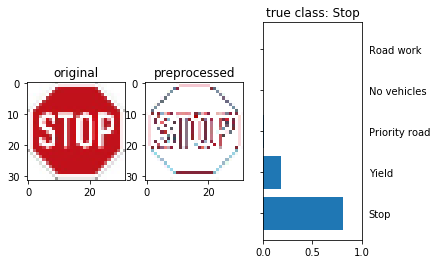

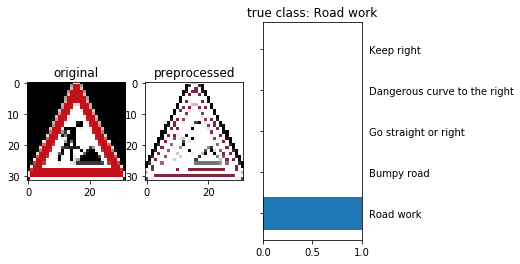

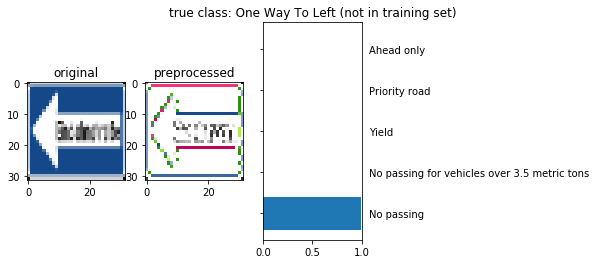

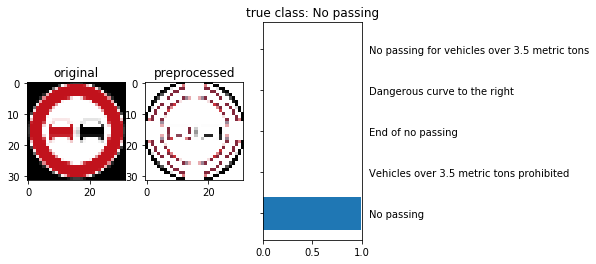

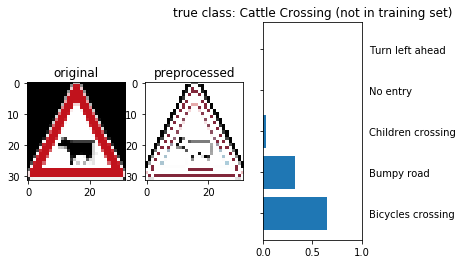

In [172]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
import math

predictedImageCount=len(rgbImage32x32Array)
for imageId in range(predictedImageCount):
    plt.figure(imageId)
    axis=plt.subplot(1,3,1)
    axis.set_title("original")
    plt.imshow(rgbImage32x32Array[imageId])
    axis=plt.subplot(1,3,2)
    axis.set_title("preprocessed")
    plt.imshow(NX_RgbImageList[imageId])
    axis=plt.subplot(1,3,3)
    axis.set_title("true class: "+signNameDictionary[trueClass[imageId]])
    axis.set_xlim(0, math.ceil(np.max(probabilities[imageId])))
    #axis.set_xlim(0, math.ceil(np.max(predictions.values[imageId])))
    #plt.barh(np.arange(predictedImageCount),predictions.values[imageId], align="center")
    plt.barh(np.arange(predictedImageCount),probabilities[imageId], align="center")
    #print("signNameDictionary:", signNameDictionary," signNameDictionary[0]:", signNameDictionary[0])
    listOfPredictions=predictions.indices[imageId].tolist()
    #print("listOfPredictions:", listOfPredictions," listOfPredictions.type:", type(listOfPredictions))
    listOfSignNames=[signNameDictionary[index] for index in listOfPredictions]
    #print ("listOfSignNames:", listOfSignNames )
    plt.yticks(np.arange(predictedImageCount), listOfSignNames)
    plt.tick_params(axis='both', which='both', labelleft='off', labelright='on')
    plt.show()
plt.close()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")